# Function

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [195]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [196]:
def plot_count(df, col, rot = 0):
    size_values = df[col].value_counts()
    colors = plt.cm.tab20(np.linspace(0, 1, len(size_values)))
    size_values.plot(kind='bar',color=colors, title=f"Number of {col}")
    plt.xlabel(f"{col.capitalize()}")
    plt.ylabel("Count")
    plt.xticks(rotation=rot)
    plt.tight_layout()
    plt.show()

In [197]:
def plot_average_price_with_error_bars(df, group_col, value_col, figsize=(12, 8), palette='tab10'):
    """
    Plots the average price by a grouping column with error margins.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - group_col (str): Column name to group by (e.g., 'size', 'color').
    - value_col (str): Column name containing the values (e.g., 'price').
    - figsize (tuple): Size of the figure (default: (12, 8)).
    - palette (str): Seaborn palette to use for the bar plot (default: 'tab10').

    Returns:
    - None
    """
    # Group by the specified column and calculate metrics
    grouped_data = df.groupby(group_col).agg(
        Average_Price=(value_col, 'mean'),
        Standard_Deviation=(value_col, 'std'),
        Sample_Size=(value_col, 'count')
    ).reset_index()

    # Calculate Standard Error and Error Margin
    grouped_data['Standard_Error'] = grouped_data['Standard_Deviation'] / np.sqrt(grouped_data['Sample_Size'])
    grouped_data['Error_Margin'] = grouped_data['Standard_Error'] * 1.96  # 95% confidence interval

    # Extract error margin values
    xerr_values = grouped_data['Error_Margin'].values

    # Create the bar plot
    plt.figure(figsize=figsize)
    sns.barplot(
        x='Average_Price',
        y=group_col,
        data=grouped_data,
        palette=palette
    )

    # Add error bars
    for i, (x, y, err) in enumerate(zip(grouped_data['Average_Price'], grouped_data[group_col], xerr_values)):
        plt.errorbar(x, i, xerr=err, fmt='none', ecolor='black', capsize=5)

    # Add titles and labels
    plt.title(f'Average {value_col.capitalize()} by {group_col.capitalize()} with Error Margins', fontsize=16, fontweight='bold')
    plt.xlabel(f'Average {value_col.capitalize()}', fontsize=14)
    plt.ylabel(group_col.capitalize(), fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Dataset

In [289]:
import pandas as pd

df = pd.read_json('final_data.json')

In [199]:
df.head()

,name,asin,brand,color,size,price,department,origin,rating,star,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3G46LT,Parisdiary,Navy,0.0,44.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
1,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CYGX1VRB,Parisdiary,None,2.0,45.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
2,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CWLJN23H,Parisdiary,Black,3.0,44.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
3,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3JXKKT,Parisdiary,Blue,1.0,44.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
4,2Pack Men's Rash Guard UPF 50+ Sun Protection ...,B0CQC72M2D,Jumgear,Black,4.0,16.99,Men,Imported,35.0,4.1,...,0,0,1,0,0,0,0,0,0,0


In [4]:
len(df)

19768

In [5]:
# Descriptive statistics
df.describe()

,size,price,rating,star,Polyester,Spandex,Nylon,Cotton,Rayon,Acrylic,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
count,19615.000000,19764.000000,19224.000000,19224.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,...,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.00000,19768.000000,19768.000000,19768.000000
mean,1.868213,29.630775,8911.205680,4.332293,0.556135,0.042690,0.100938,0.216769,0.061772,0.003378,...,0.049373,0.086453,0.594699,0.038598,0.095103,0.081141,0.04052,0.042746,0.026760,0.086959
std,1.365355,14.563845,20519.059455,0.255098,0.418490,0.062037,0.268955,0.347077,0.213710,0.050097,...,0.216650,0.281039,0.490963,0.192639,0.293365,0.273059,0.19718,0.202289,0.161387,0.281782
min,0.000000,4.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,19.990000,180.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,28.500000,1316.000000,4.300000,0.630000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,3.000000,37.590000,7144.000000,4.500000,0.970000,0.050000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,4.000000,385.990000,176989.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


# Handle Missing value

In [6]:
# Analyse missing data
draw_missing_data_table(df)

,Total,Percent
color,3463,0.175182
rating,544,0.027519
star,544,0.027519
size,153,0.007740
price,4,0.000202
name,0,0.000000
Pull on,0,0.000000
Silk,0,0.000000
Machine Wash,0,0.000000
Hand Wash,0,0.000000


In [7]:
# Handle missing value for color
import numpy as np

color_probabilities = df['color'].value_counts(normalize=True, dropna=True)
nan_indices = df['color'][df['color'].isna()].index
df.loc[nan_indices, 'color'] = np.random.choice(color_probabilities.index, size=len(nan_indices), p=color_probabilities.values)

In [8]:
# Drop missing value in the other features
df = df.dropna()

In [9]:
draw_missing_data_table(df)

,Total,Percent
name,0,0.0
Tumble Dry,0,0.0
Leather,0,0.0
Linen,0,0.0
Silk,0,0.0
Machine Wash,0,0.0
Hand Wash,0,0.0
Not Bleach,0,0.0
Pull on,0,0.0
Wool,0,0.0


# EDA

In [11]:
df.head()

,name,asin,brand,color,size,price,department,origin,rating,star,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3G46LT,Parisdiary,Navy,0.0,44.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
1,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CYGX1VRB,Parisdiary,Red,2.0,45.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
2,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CWLJN23H,Parisdiary,Black,3.0,44.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
3,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3JXKKT,Parisdiary,Blue,1.0,44.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
4,2Pack Men's Rash Guard UPF 50+ Sun Protection ...,B0CQC72M2D,Jumgear,Black,4.0,16.99,Men,Imported,35.0,4.1,...,0,0,1,0,0,0,0,0,0,0


## Price

In [49]:
df['price'].describe()

count    19080.000000
mean        29.889226
std         14.491433
min          5.000000
25%         19.990000
50%         28.970000
75%         37.970000
max        385.990000
Name: price, dtype: float64

<Axes: title={'center': 'Distribution of price'}, xlabel='price', ylabel='Count'>

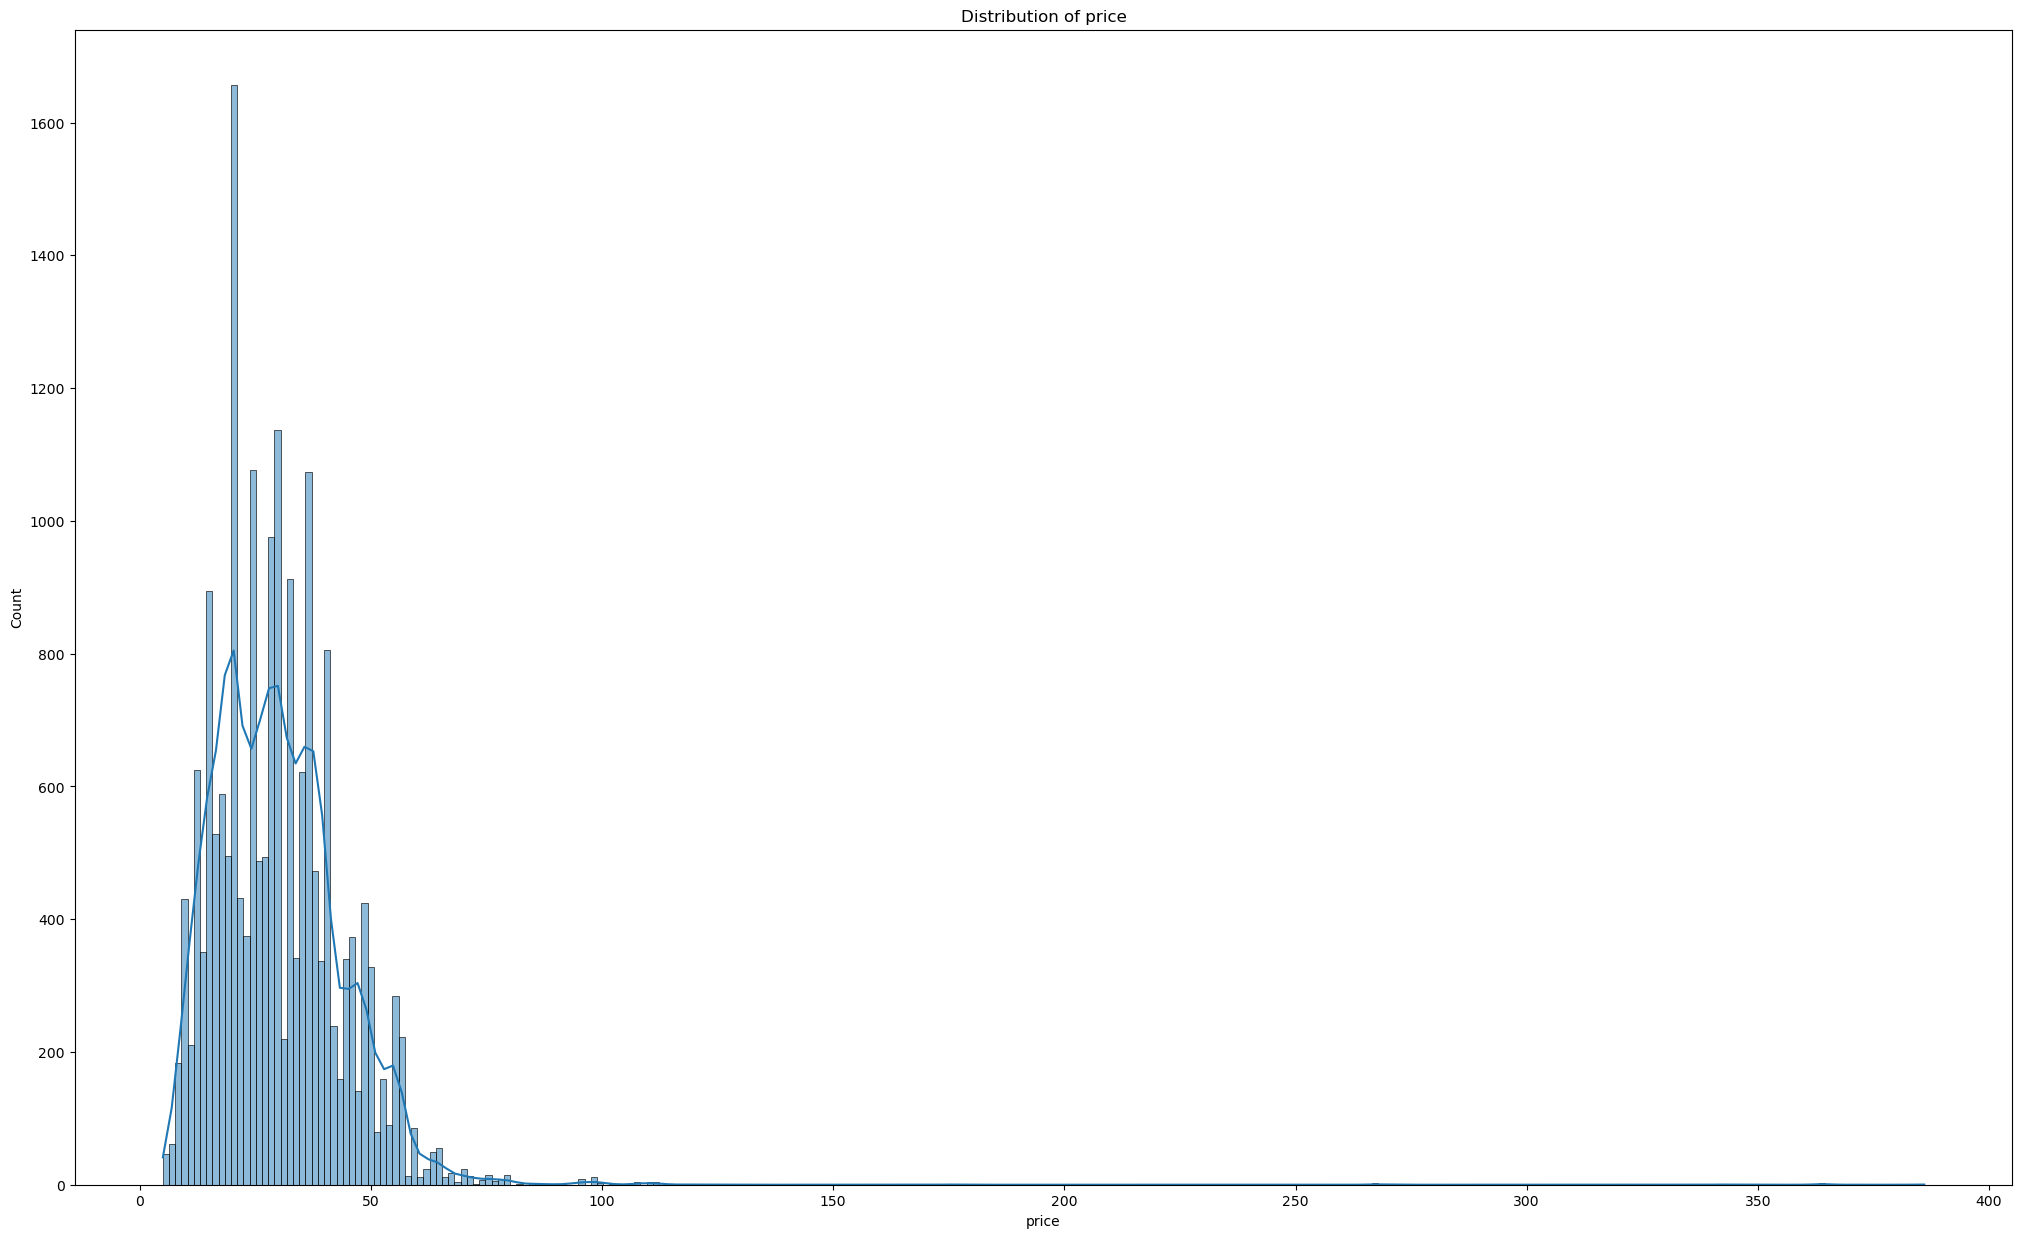

In [60]:
plt.figure(figsize=(25, 15))
plt.title('Distribution of price')

sns.histplot(df['price'], kde=True)

## Brand

In [19]:
df1 = df[df['brand'].map(df['brand'].value_counts()) >= 100]


In [22]:
df1 = df1.reset_index(drop=True)

In [ ]:
brand_price = df1.groupby("brand")["price"].mean().reset_index()

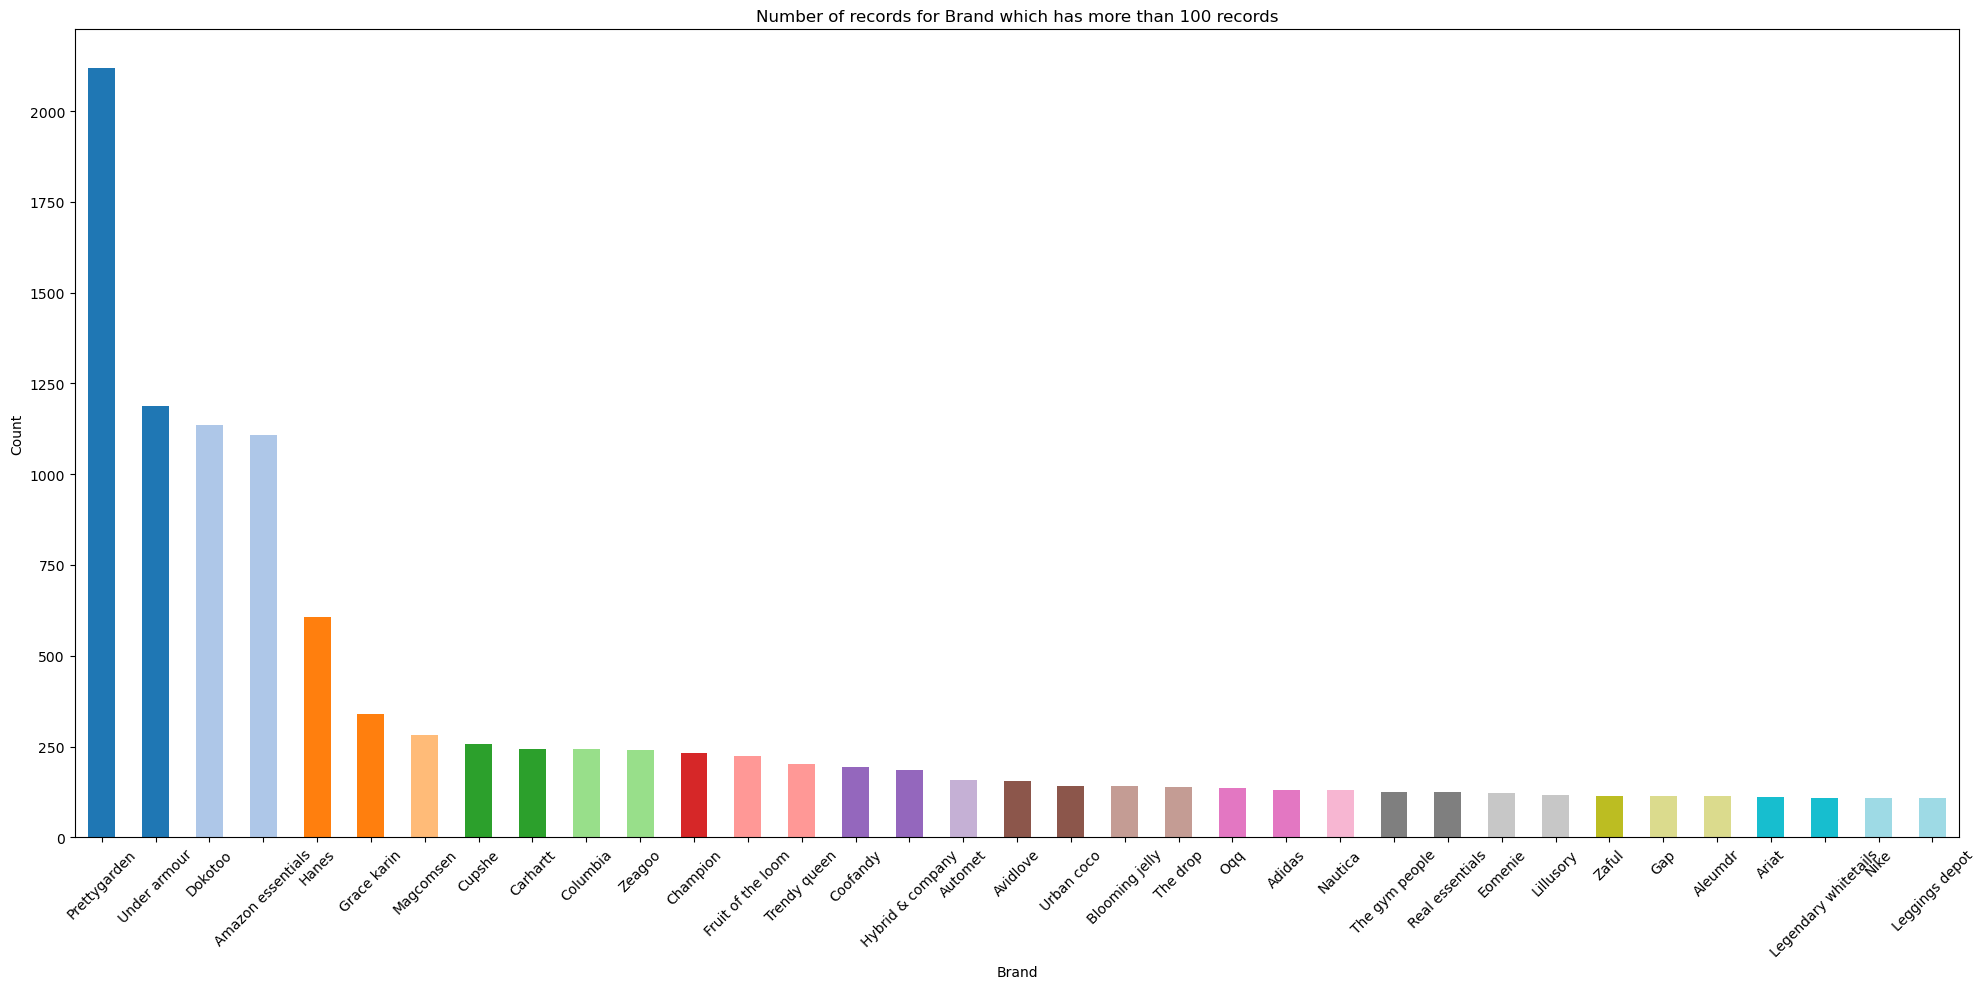

In [ ]:
plt.figure(figsize=(20, 10))

brand_counts = df1['brand'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(brand_counts)))
brand_counts.plot(kind='bar',color=colors, title="Number of records for Brand which has more than 100 records")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Brand Prices'}, xlabel='Brand', ylabel='Price'>

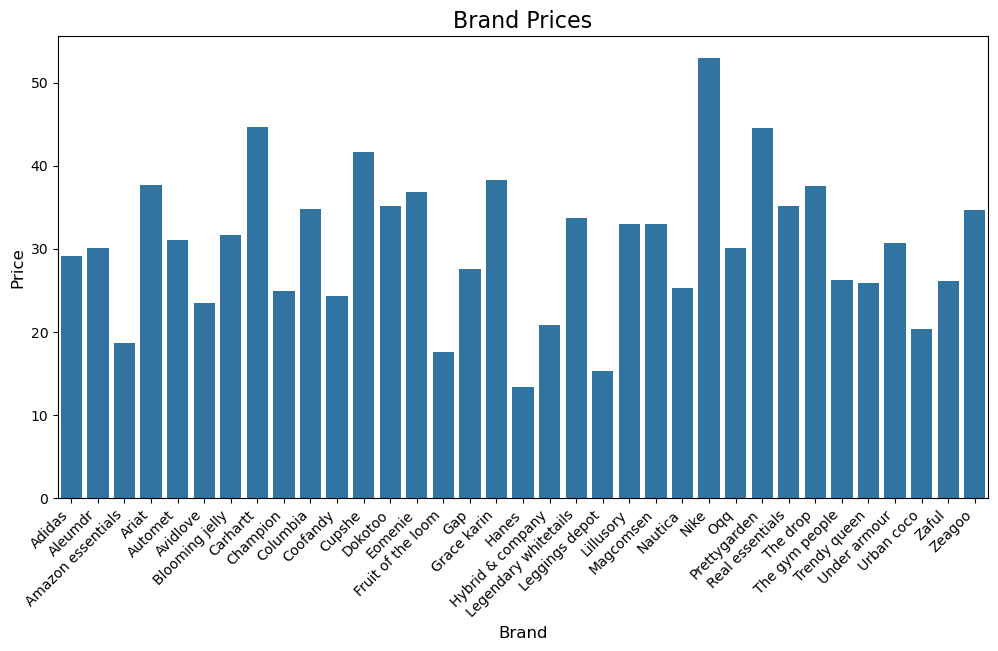

In [35]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha="right")

# Add title and axis labels
plt.title("Brand Prices", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.barplot(data=brand_price, x="brand", y="price")

## Color

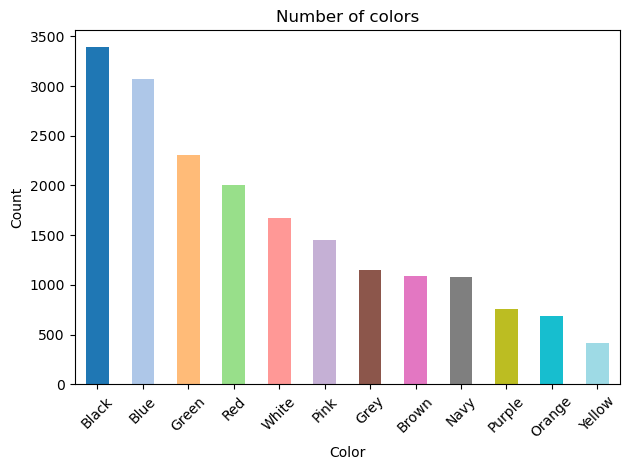

In [118]:
color_values = df['color'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(color_values)))
color_values.plot(kind='bar',color=colors, title="Number of colors")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

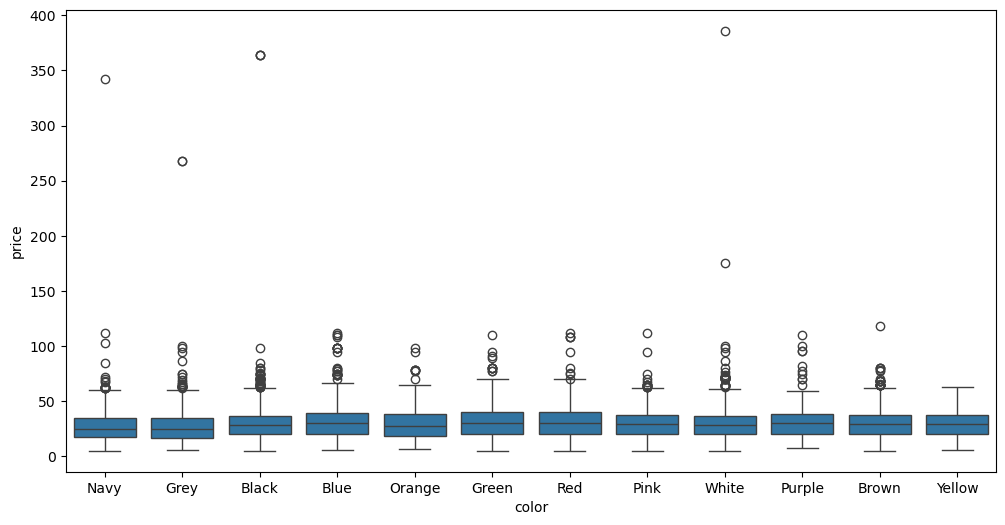

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="color", y="price")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


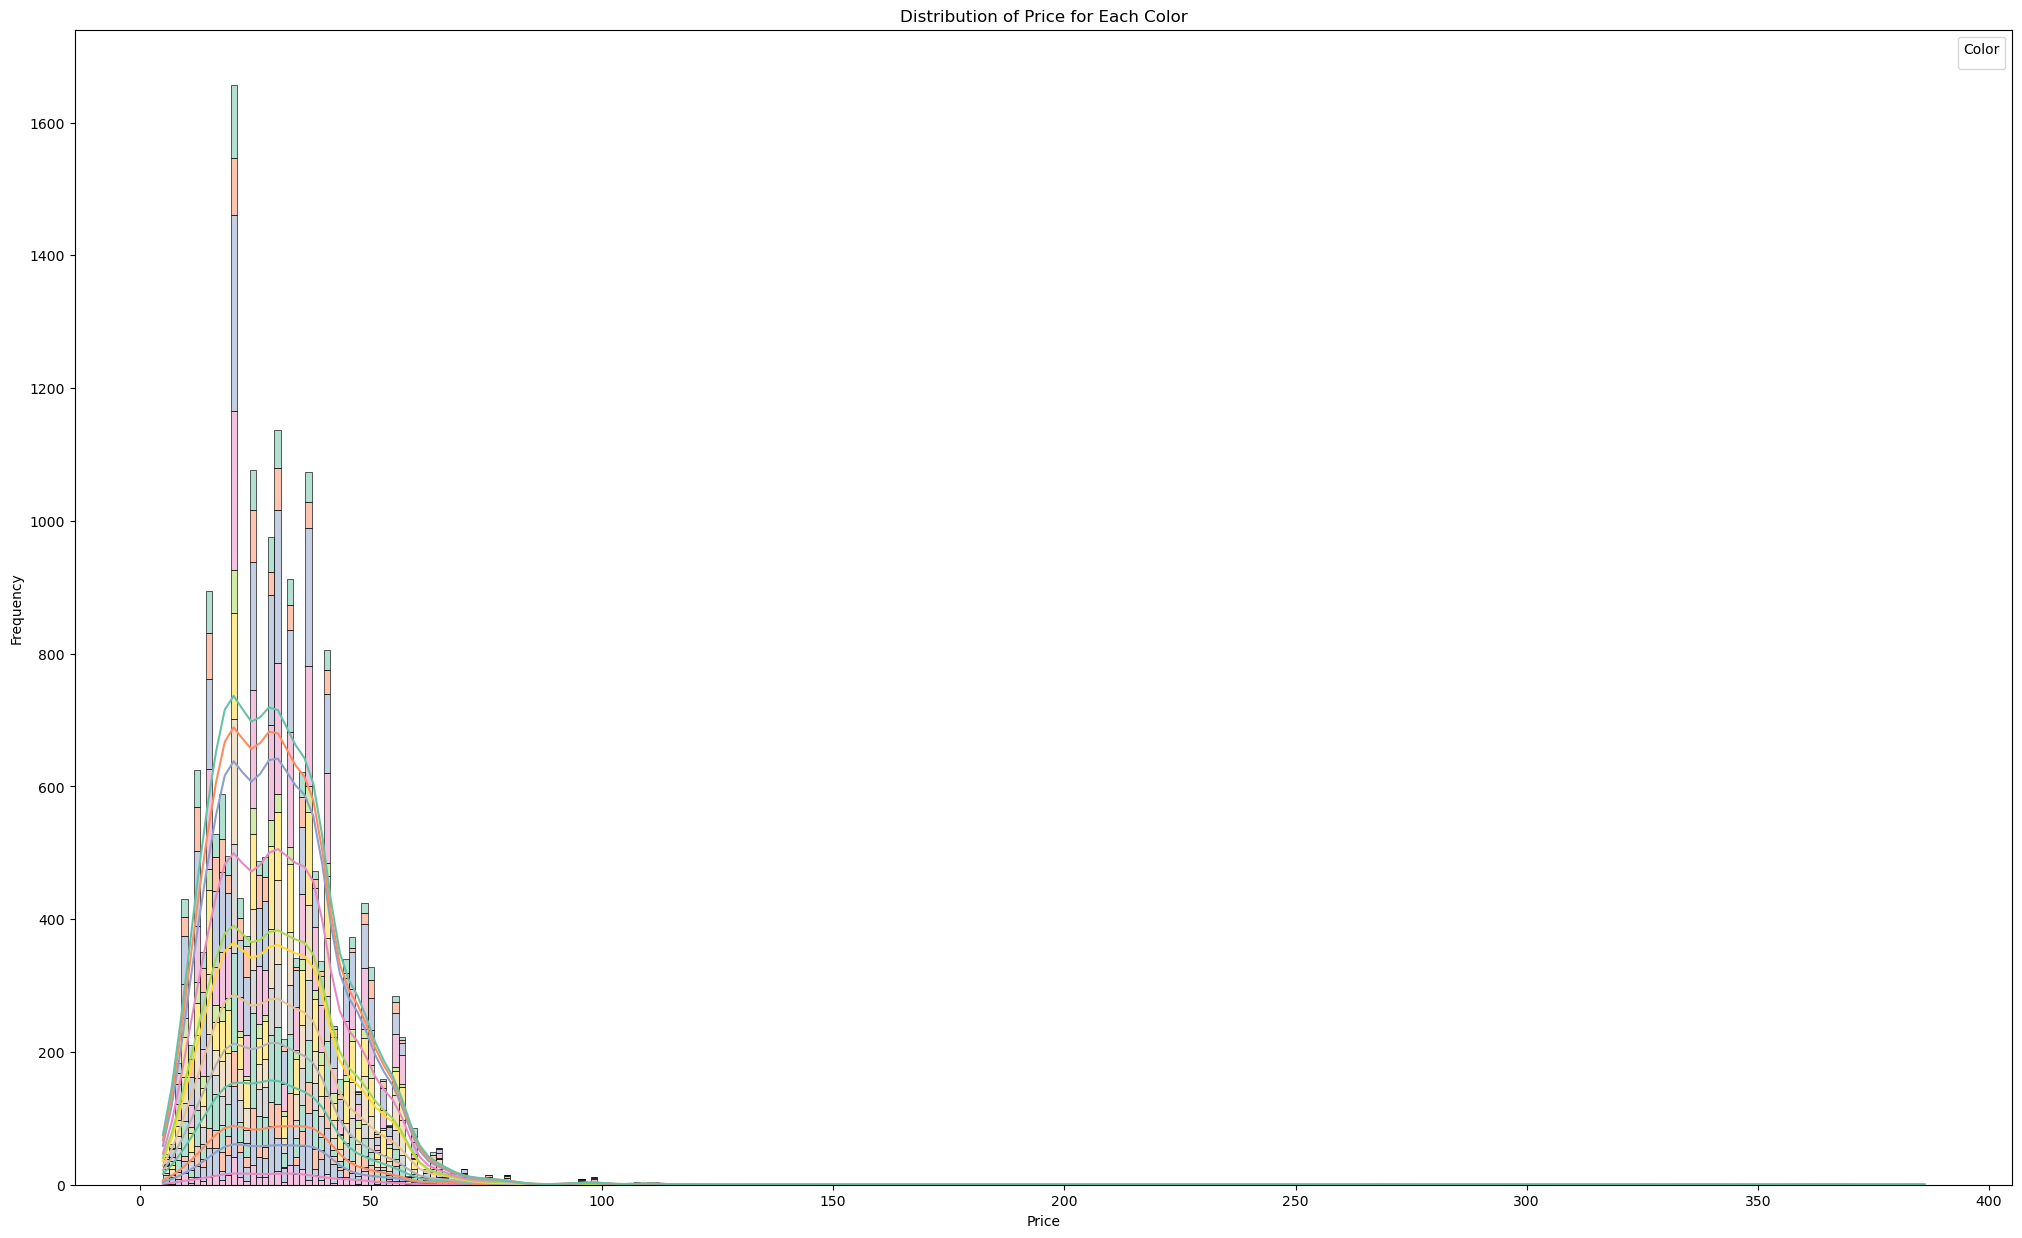

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))
plt.title('Distribution of Price for Each Color')

# Plot distribution with color grouping
sns.histplot(data=df, x='price', hue='color', kde=True, multiple='stack', palette='Set2')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='Color')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_price_distribution_by_color(df, color, ax):

    # Filter the DataFrame for the given color
    filtered_data = df[df['color'].str.lower() == color.lower()]

    background_color = '#f0f0f0'
    ax.set_facecolor(background_color)

    histogram_color = color.lower()
    edge_color = 'black'

    # Plot the histogram
    sns.histplot(filtered_data['price'], kde=True, color=histogram_color, ax=ax, edgecolor=edge_color)

    # Set plot details
    ax.set_title(f'Distribution of Price for {color.capitalize()} Products', fontsize=12, fontweight='bold')
    ax.set_xlabel('Price', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)


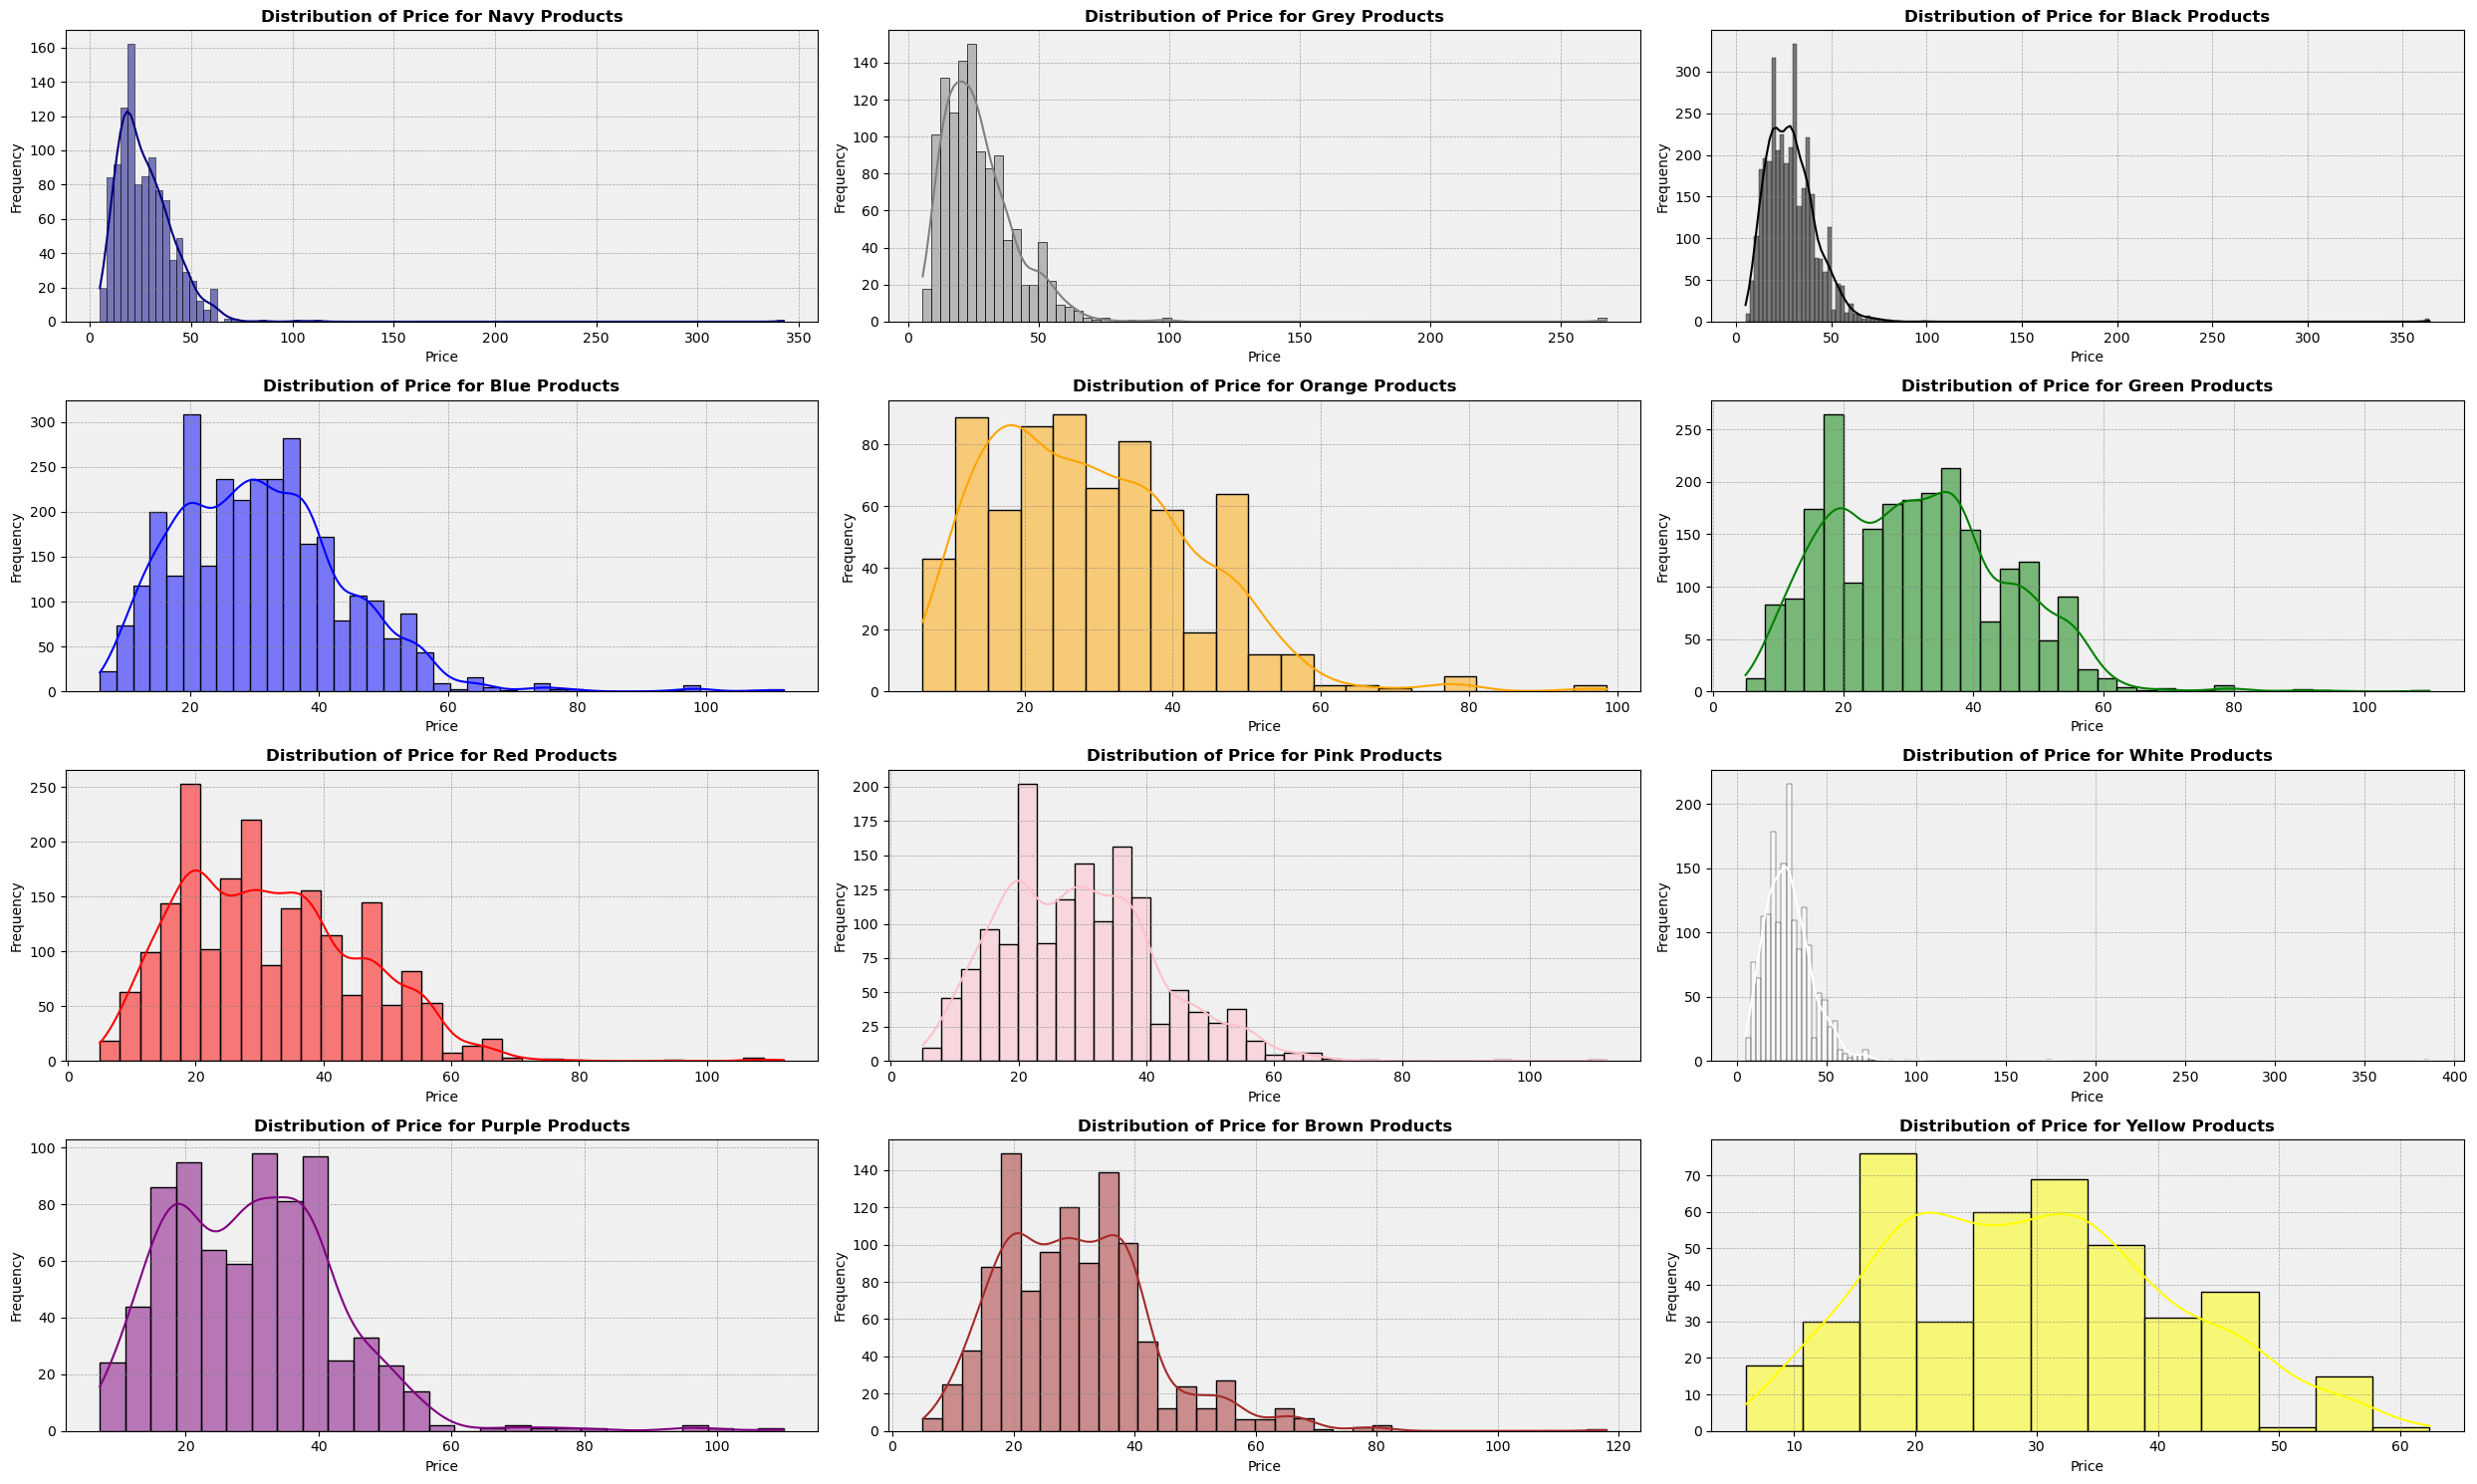

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors
colors = ['Navy', 'Grey', 'Black', 'Blue', 'Orange', 'Green', 
          'Red', 'Pink', 'White', 'Purple', 'Brown', 'Yellow']

# Example usage with subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 15))  

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through colors and plot
for i, color in enumerate(colors):
    plot_price_distribution_by_color(df, color, axes[i])  

# Hide unused subplots (if any)
for j in range(len(colors), len(axes)):
    axes[j].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame
# Group by color and calculate metrics
grouped_data = df.groupby('color').agg(
    Average_Price=('price', 'mean'),
    Standard_Deviation=('price', 'std'),
    Sample_Size=('price', 'count')
).reset_index()

# Calculate Standard Error and Error Margin
grouped_data['Standard_Error'] = grouped_data['Standard_Deviation'] / np.sqrt(grouped_data['Sample_Size'])
grouped_data['Error_Margin'] = grouped_data['Standard_Error'] * 1.96  # 95% confidence interval

C:\Users\eroma\AppData\Local\Temp\ipykernel_14324\3706814271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


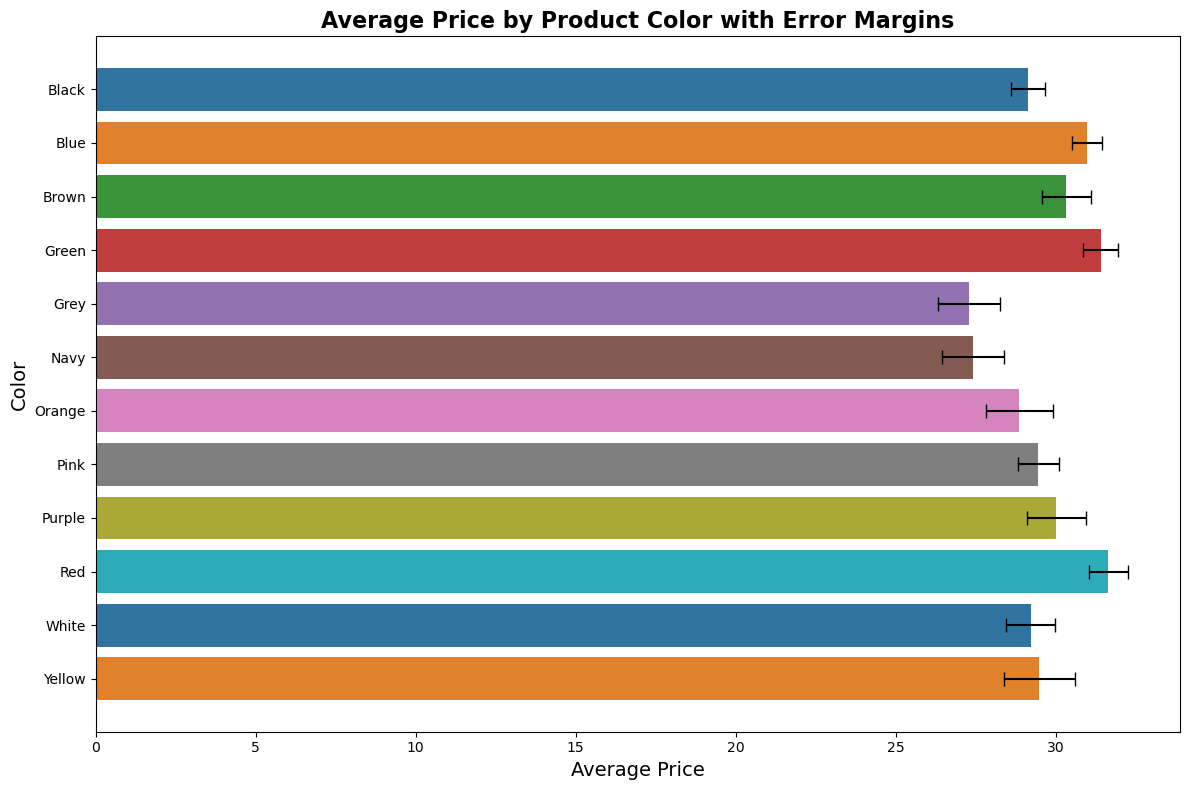

In [149]:
# Ensure that Error_Margin is a numpy array or pandas Series
xerr_values = grouped_data['Error_Margin'].values

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Average_Price',
    y='color',
    data=grouped_data,
    palette='tab10'
)

# Add error bars manually using matplotlib
for i, (x, y, err) in enumerate(zip(grouped_data['Average_Price'], grouped_data['color'], xerr_values)):
    plt.errorbar(x, i, xerr=err, fmt='none', ecolor='black', capsize=5)

# Add titles and labels
plt.title('Average Price by Product Color with Error Margins', fontsize=16, fontweight='bold')
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Color', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Size

In [150]:
size_map = {'Small':0, 'Medium':1, 'Large':2, "X-Large":3, "XX-Large":4}

In [151]:
decode_size = {0:"Small",1:"Medium", 2:"Large",3:"X-Large",4:"XX-Large"}

In [152]:
df1 =df.copy()

In [153]:
df1.head()

,name,asin,brand,color,size,price,department,origin,rating,star,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3G46LT,Parisdiary,Navy,0.0,44.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
1,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CYGX1VRB,Parisdiary,Grey,2.0,45.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
2,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CWLJN23H,Parisdiary,Black,3.0,44.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
3,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3JXKKT,Parisdiary,Blue,1.0,44.99,Men,Imported,909.0,4.5,...,0,0,0,0,1,0,0,0,0,0
4,2Pack Men's Rash Guard UPF 50+ Sun Protection ...,B0CQC72M2D,Jumgear,Black,4.0,16.99,Men,Imported,35.0,4.1,...,0,0,1,0,0,0,0,0,0,0


In [154]:
df1['size'] =df1['size'].map(decode_size)

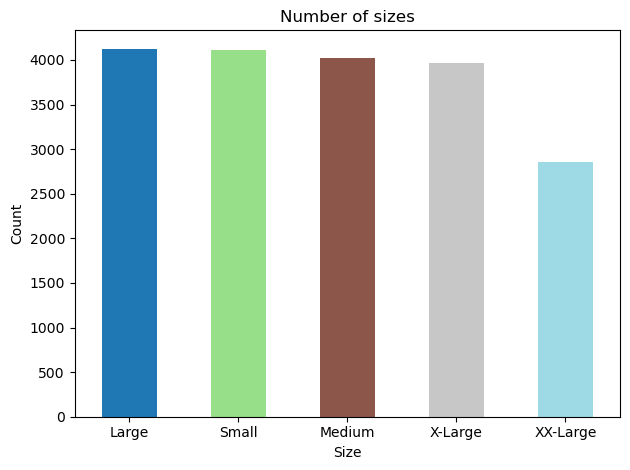

In [156]:
size_values = df1['size'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(size_values)))
size_values.plot(kind='bar',color=colors, title="Number of sizes")
plt.xlabel("Size")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


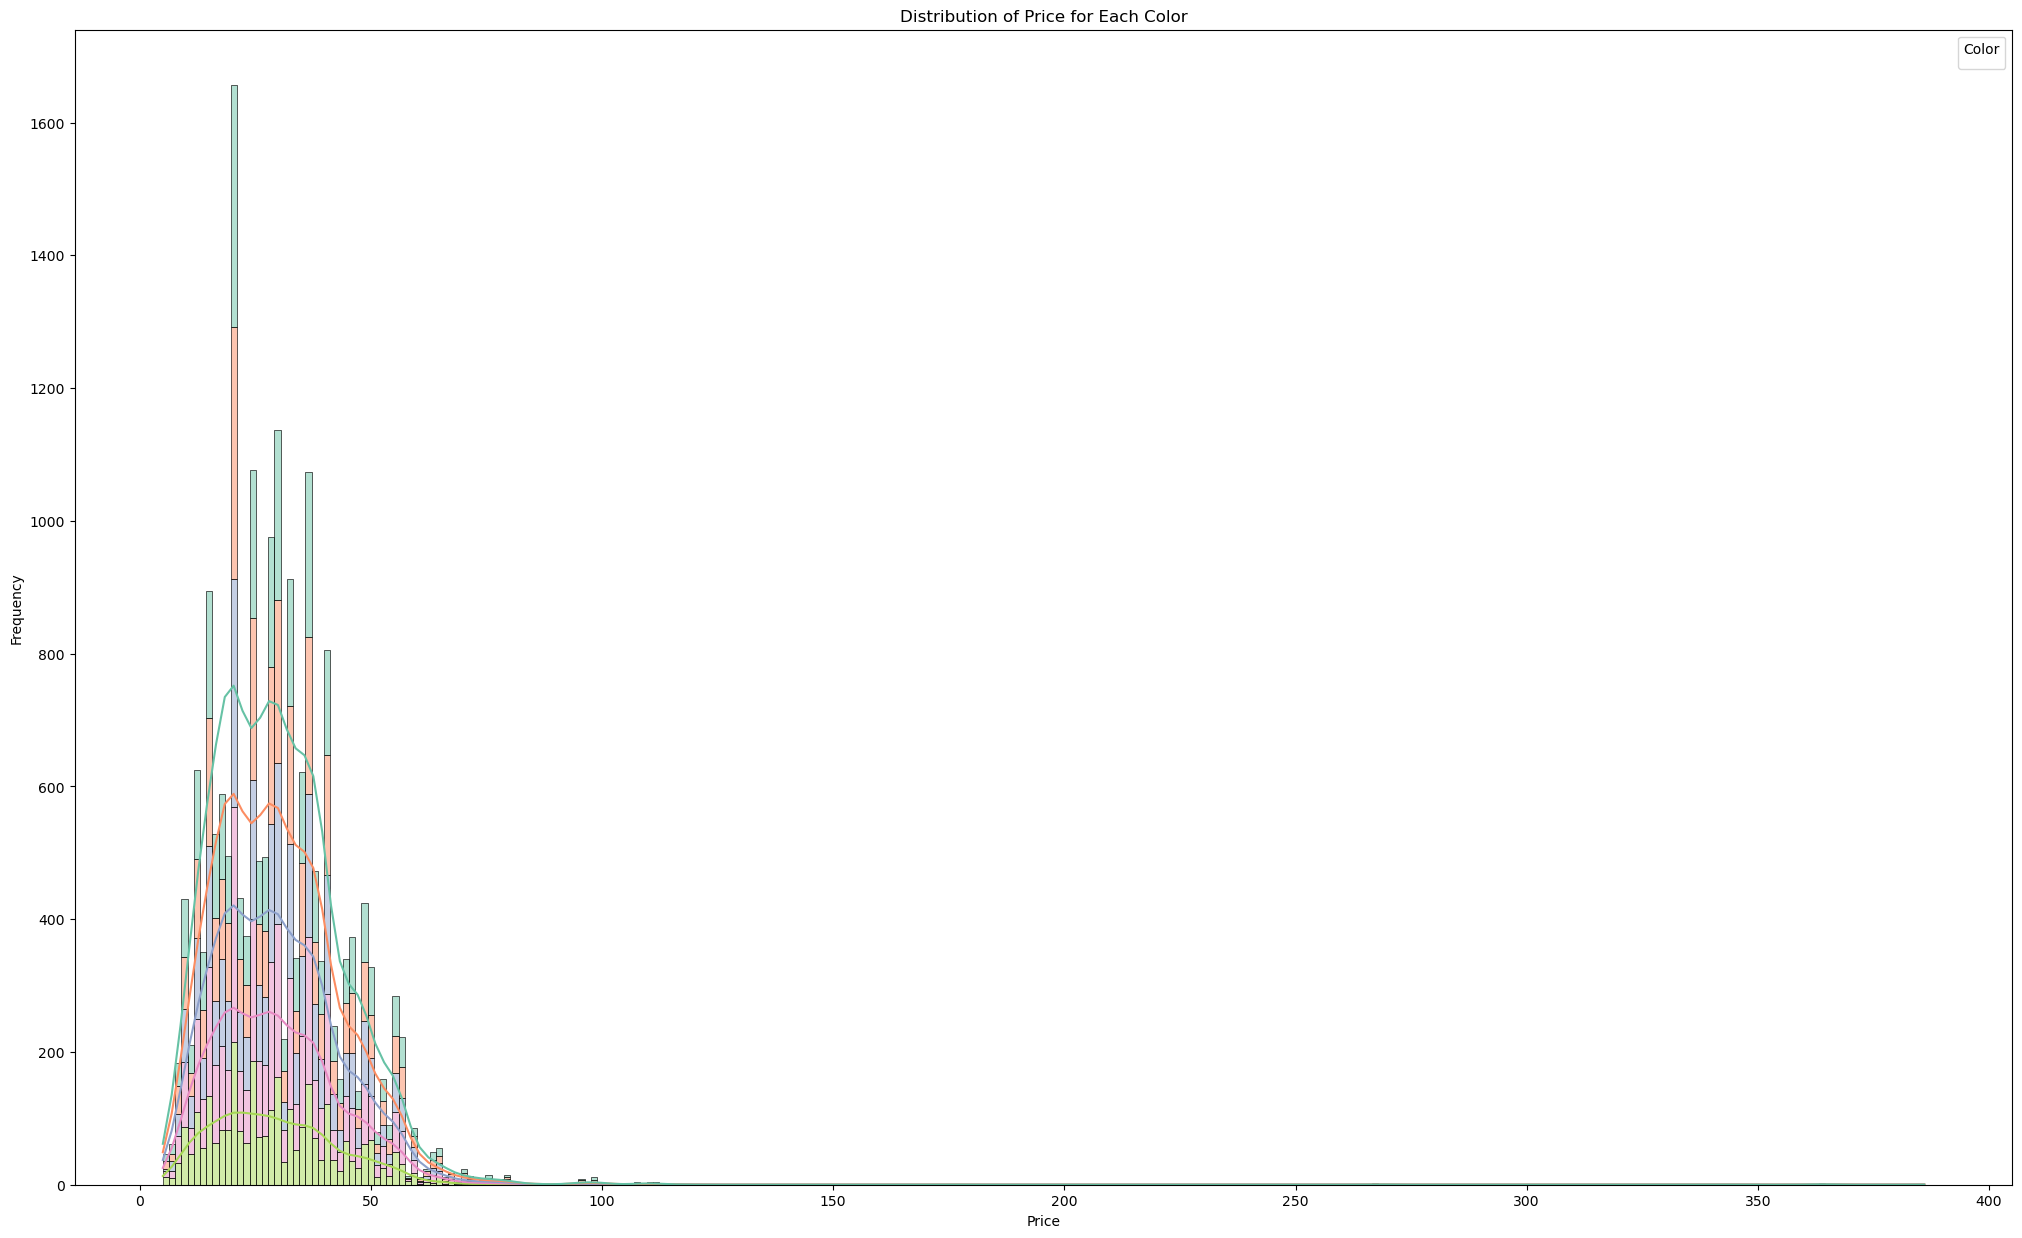

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))
plt.title('Distribution of Price for Each Color')

# Plot distribution with color grouping
sns.histplot(data=df1, x='price', hue='size', kde=True, multiple='stack', palette='Set2')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


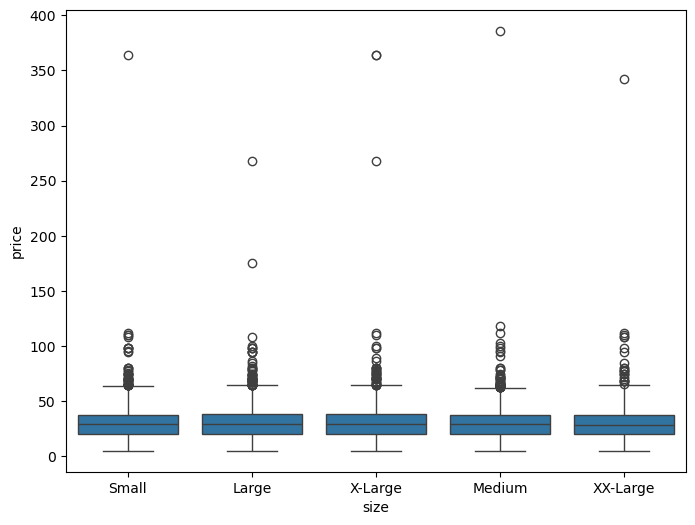

In [139]:
#box plot overallqual/saleprice
var = 'size'
data = pd.concat([df1['price'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)

C:\Users\eroma\AppData\Local\Temp\ipykernel_14324\959142301.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


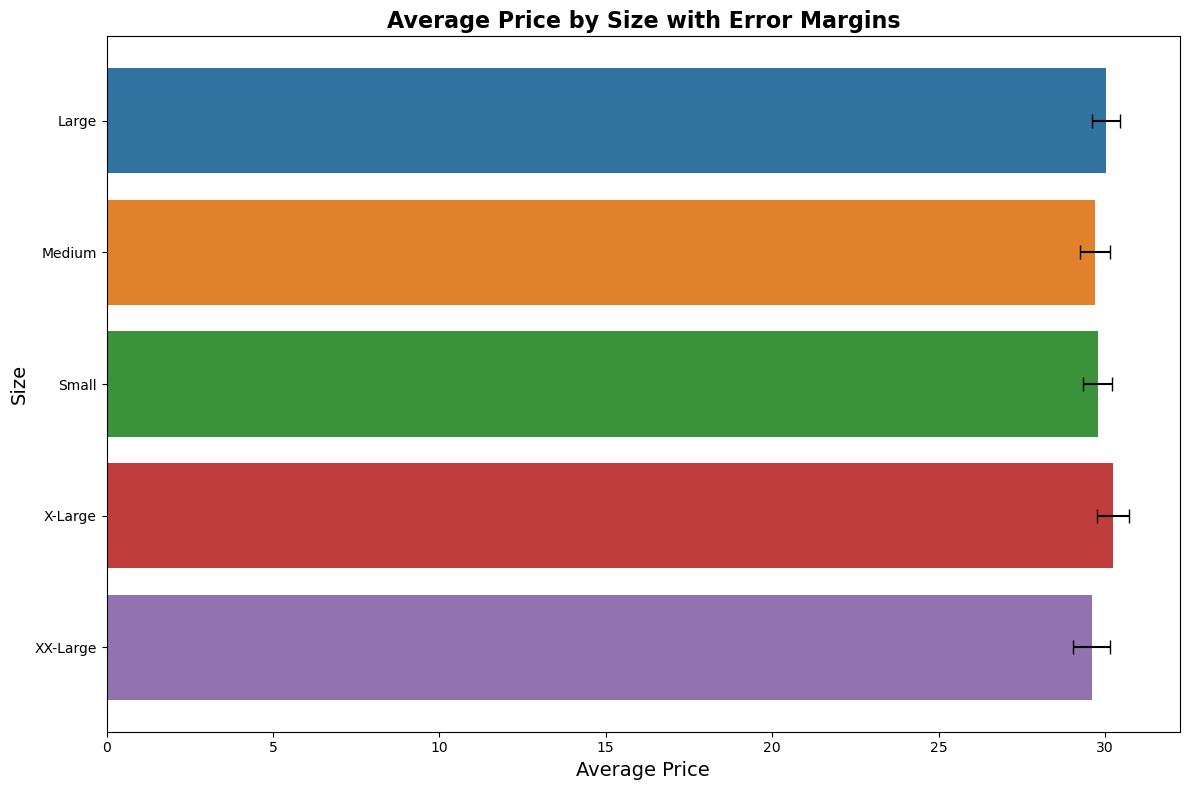

In [184]:
plot_average_price_with_error_bars(df1, 'size', 'price', figsize=(12, 8), palette='tab10')

## Department

In [175]:
df['department']

0          Men
1          Men
2          Men
3          Men
4          Men
         ...  
19763    Women
19764    Women
19765    Women
19766    Women
19767    Women
Name: department, Length: 19080, dtype: object

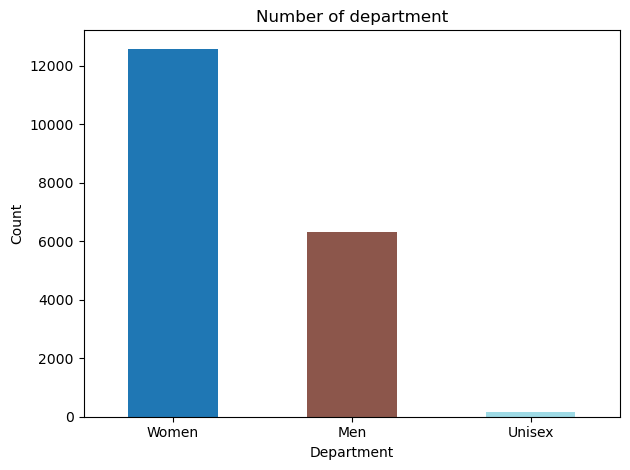

In [176]:
plot_count(df, 'department')

Because of minimal values of Unisex, we should remove it

C:\Users\eroma\AppData\Local\Temp\ipykernel_14324\1918823668.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


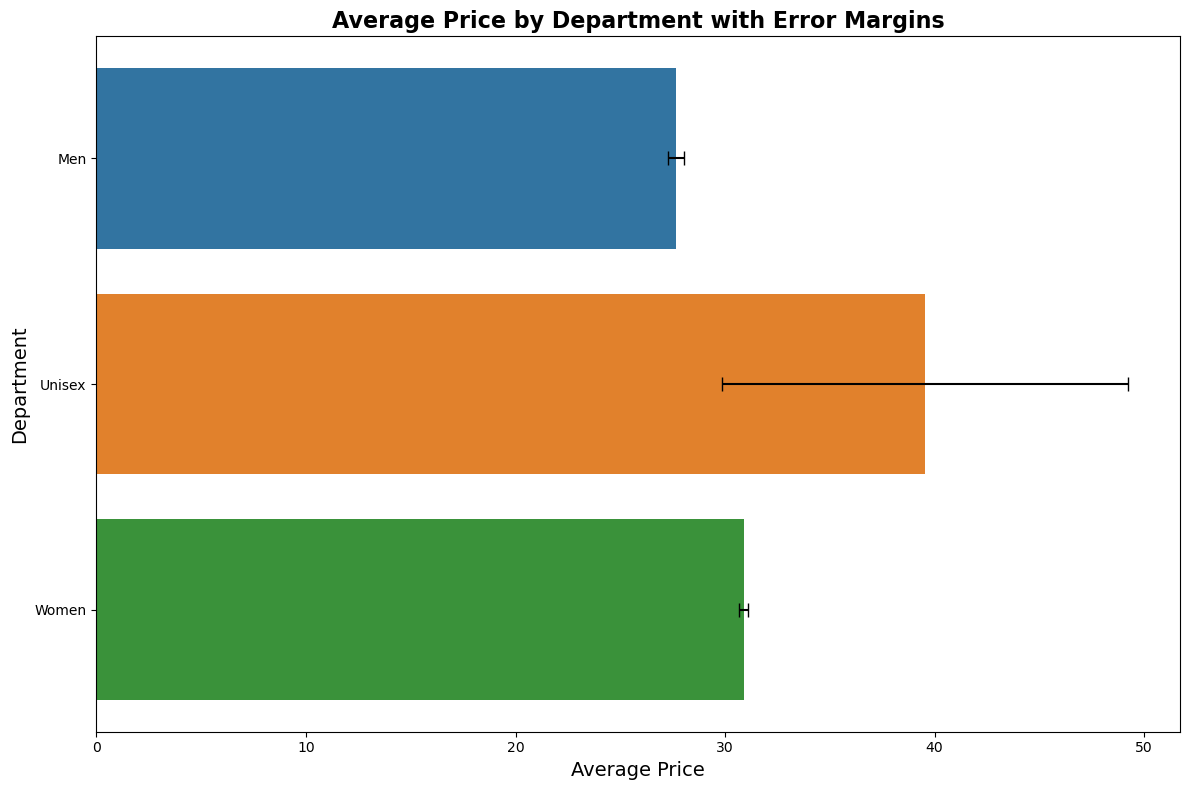

In [179]:
plot_average_price_with_error_bars(df, 'department', 'price', figsize=(12, 8), palette='tab10')

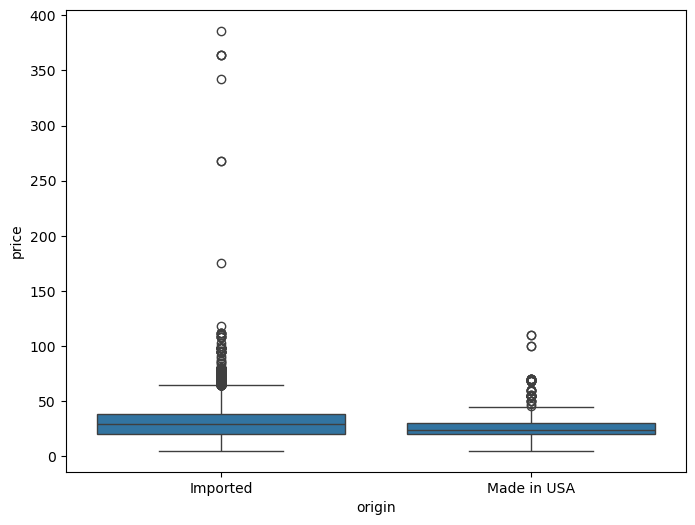

In [189]:
#box plot overallqual/saleprice
var = 'origin'
data = pd.concat([df1['price'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)

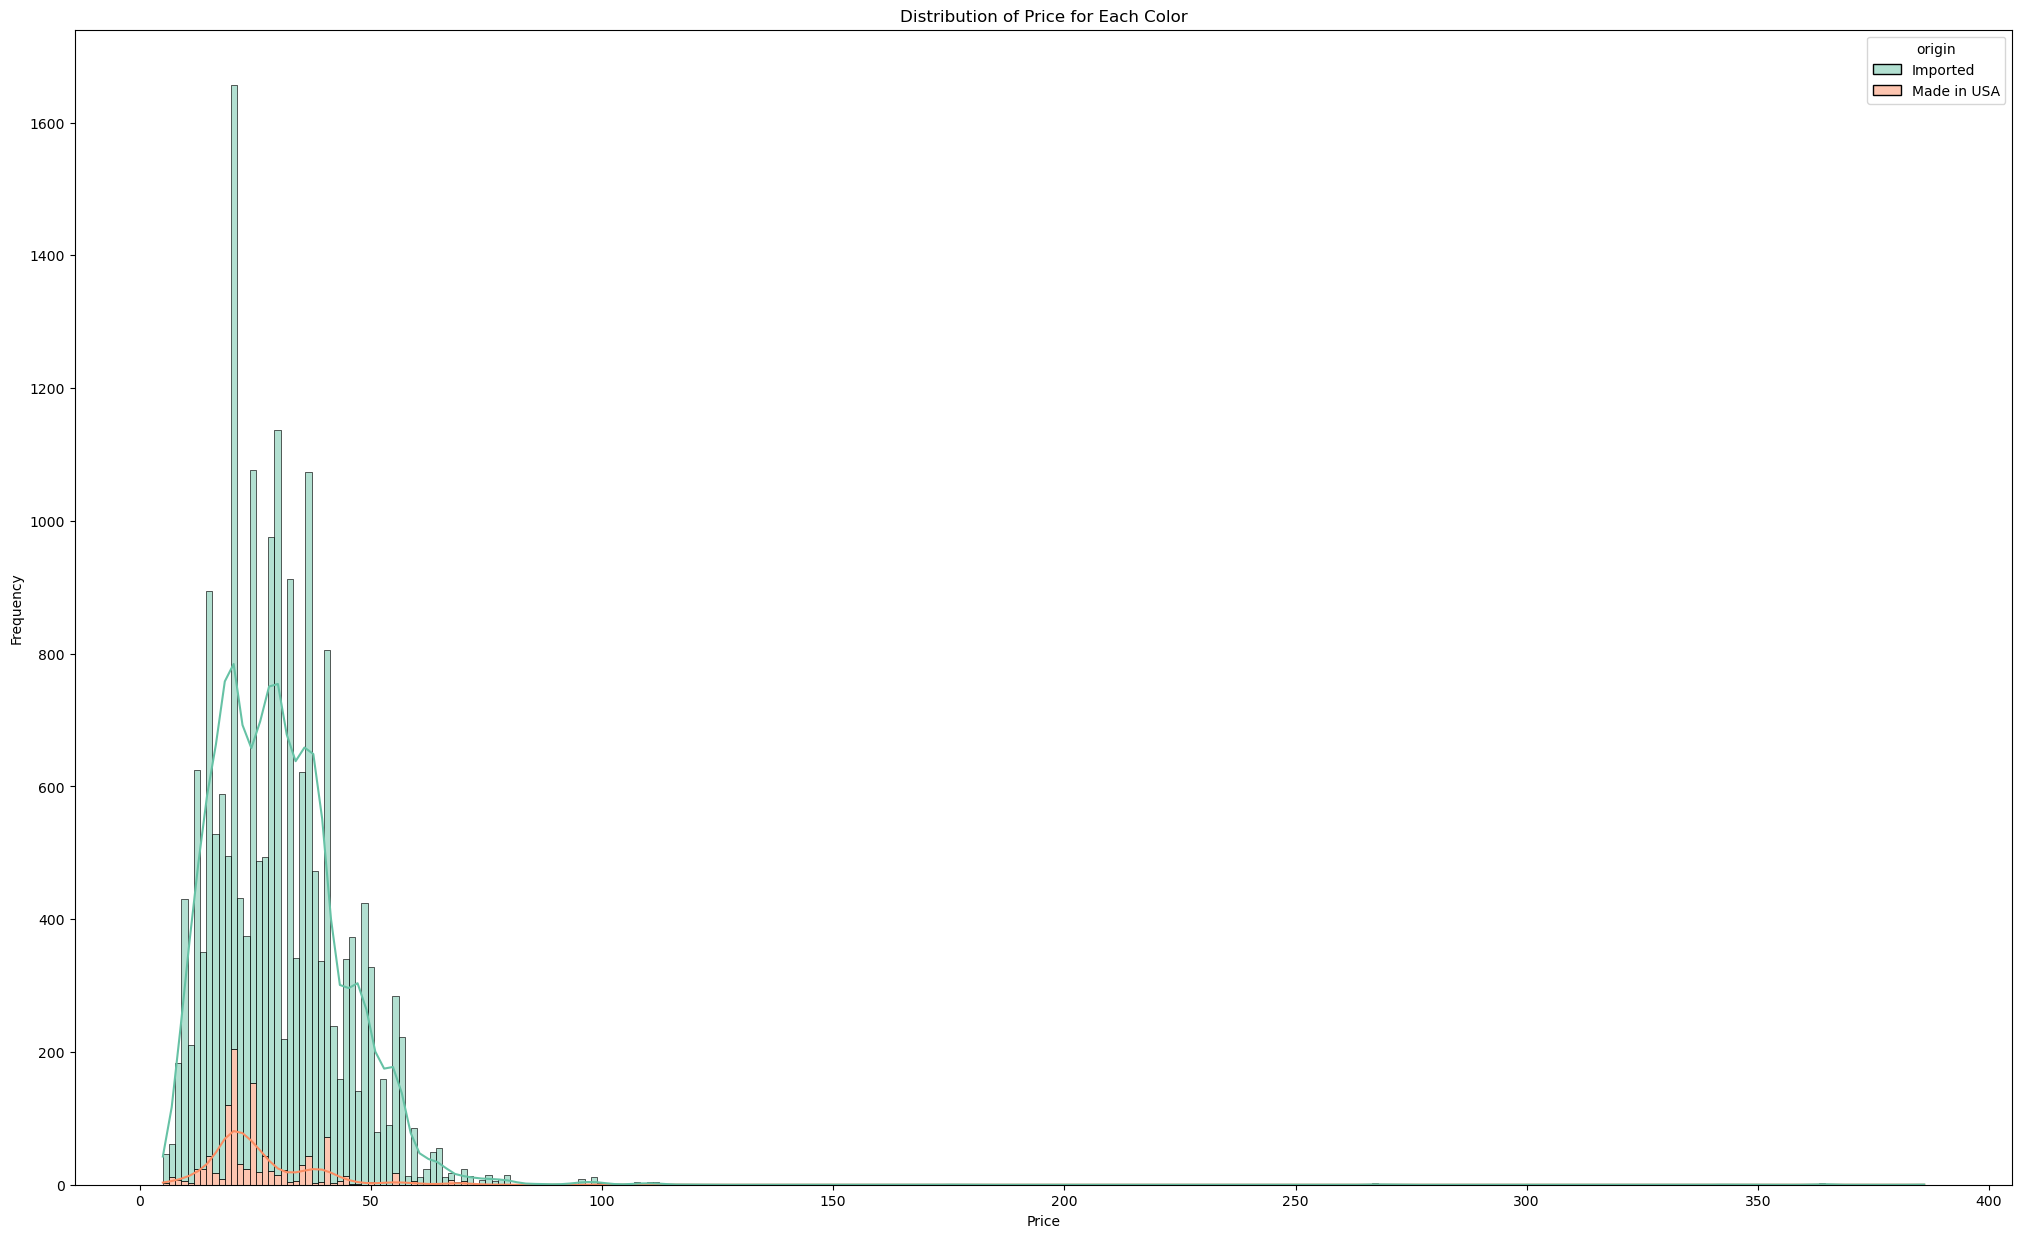

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))
plt.title('Distribution of Price for Each Color')

# Plot distribution with color grouping
sns.histplot(data=df1, x='price', hue='origin', kde=True, multiple='stack', palette='Set2')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


## Origin

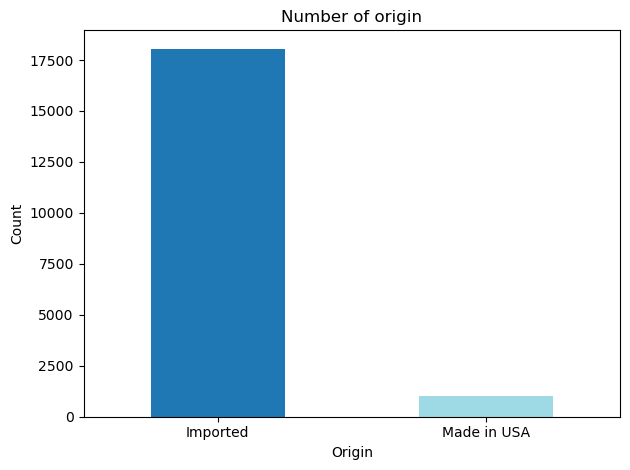

In [186]:
plot_count(df, 'origin')

C:\Users\eroma\AppData\Local\Temp\ipykernel_14324\959142301.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


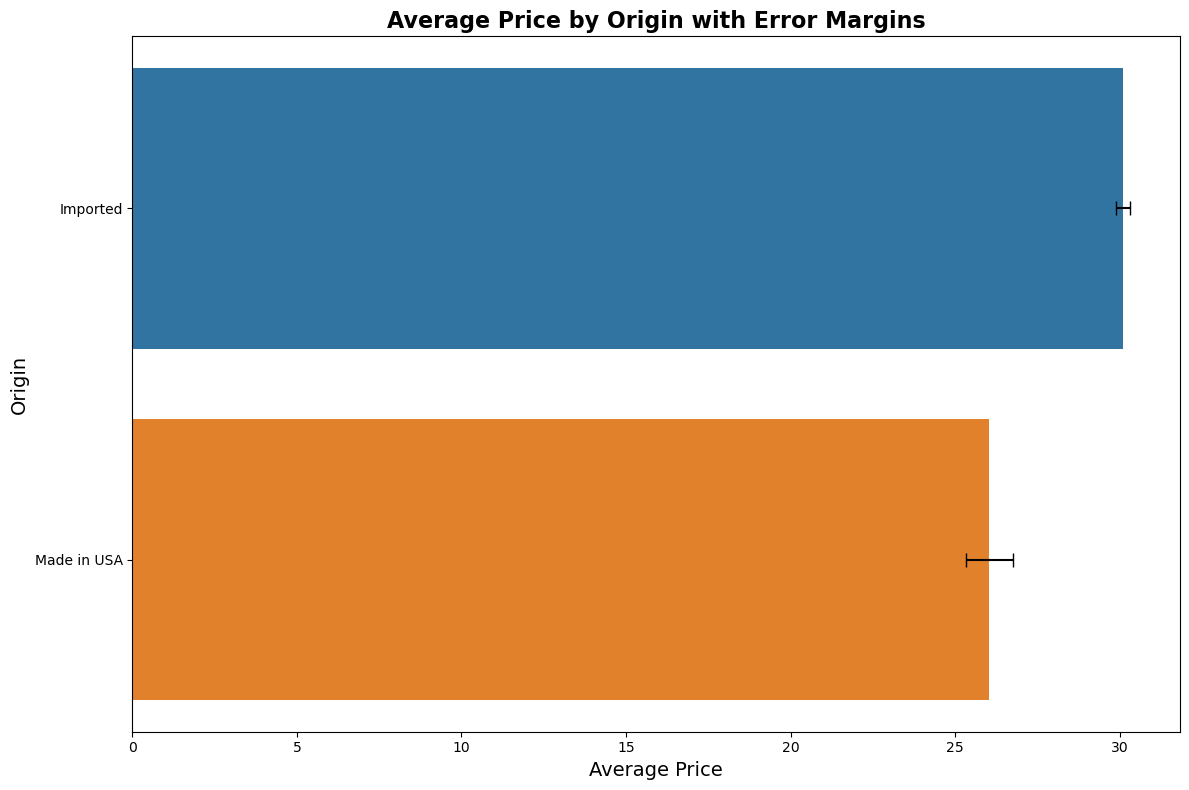

In [188]:
plot_average_price_with_error_bars(df, 'origin', 'price', figsize=(12, 8), palette='tab10')

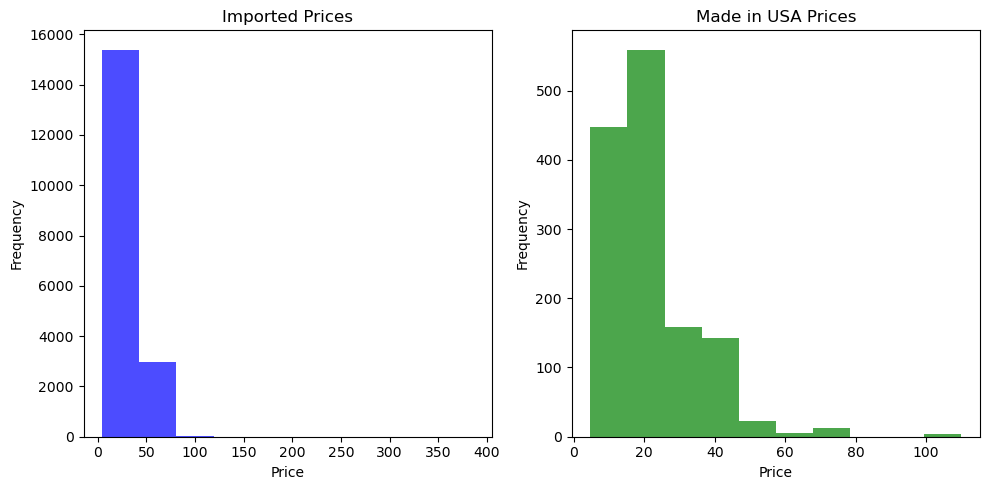

In [202]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for each category
imported_prices = df[df['origin'] == 'Imported']['price']
made_in_usa_prices = df[df['origin'] == 'Made in USA']['price']

# Plot separate histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(imported_prices, alpha=0.7, color='blue')
plt.title('Imported Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(made_in_usa_prices, alpha=0.7, color='green')
plt.title('Made in USA Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


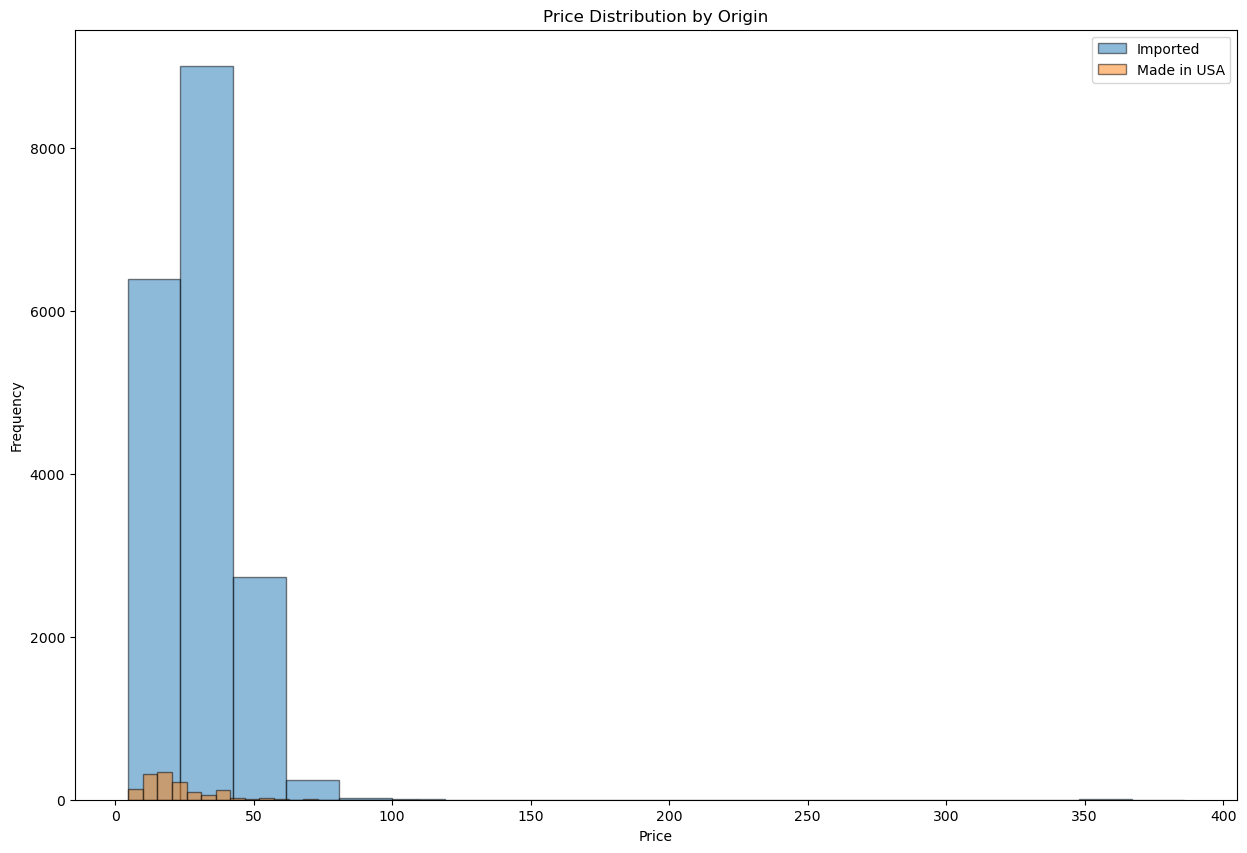

In [208]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
# Replace 'origin' with your column name for origin and 'price' with your target column
data = pd.DataFrame({
    'price': df['price'],
    'origin': df['origin']
})

# Plot a single histogram with both origins
plt.figure(figsize=(15,10))

# Overlayed histograms
for origin in data['origin'].unique():
    subset = data[data['origin'] == origin]
    plt.hist(subset['price'], alpha=0.5, label=origin, bins=20, edgecolor='black')

plt.title('Price Distribution by Origin')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


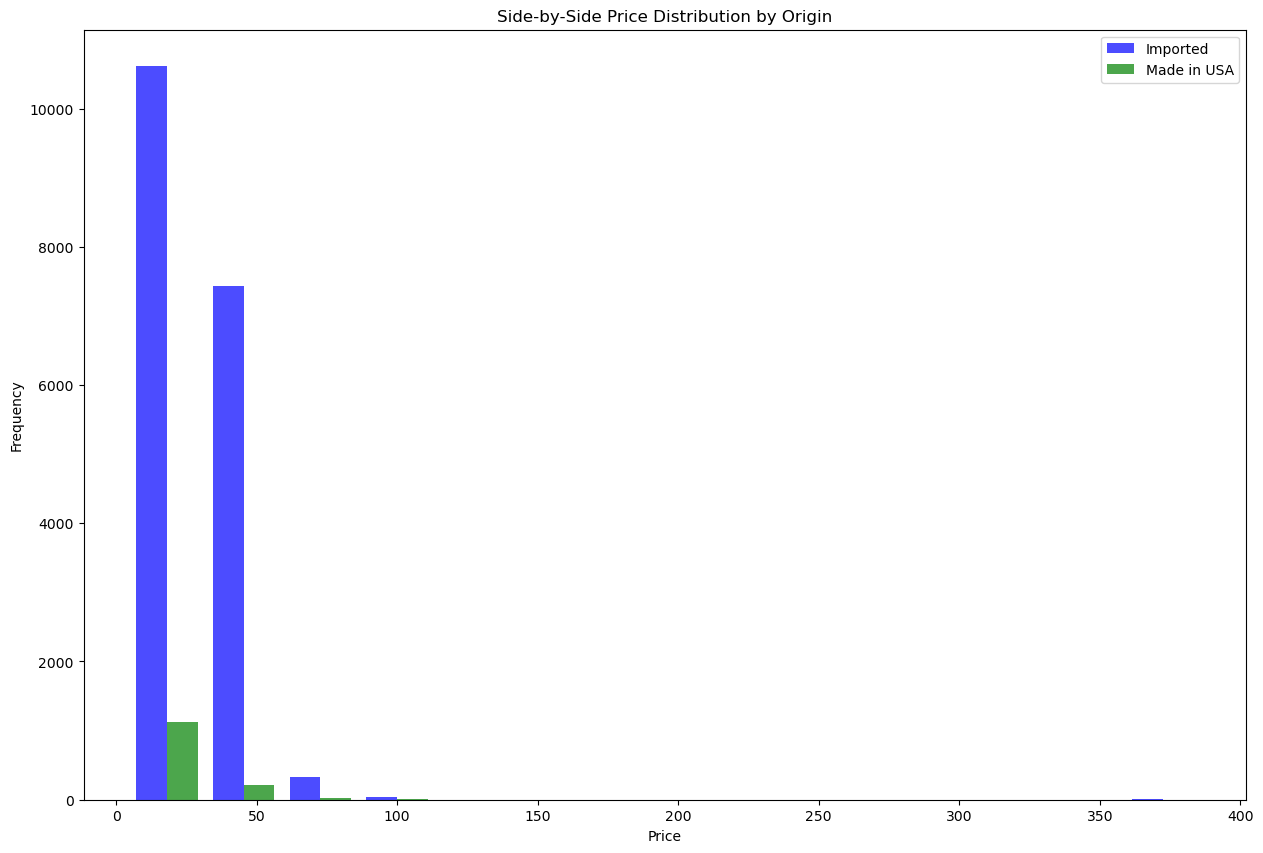

In [211]:
import matplotlib.pyplot as plt
import numpy as np

# Define the bins for the histogram
bins = np.linspace(df['price'].min(), df['price'].max(), 15)  # Adjust 15 for desired granularity

# Compute histograms for both categories
imported_hist, _ = np.histogram(imported_prices, bins=bins)
usa_hist, _ = np.histogram(made_in_usa_prices, bins=bins)

# Define bar width and positions
bar_width = (bins[1] - bins[0]) * 0.4  # Adjust 0.4 for spacing between bars
bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate bin centers

# Plot side-by-side histograms
plt.figure(figsize=(15, 10))

plt.bar(bin_centers - bar_width / 2, imported_hist, width=bar_width, label='Imported', color='blue', alpha=0.7)
plt.bar(bin_centers + bar_width / 2, usa_hist, width=bar_width, label='Made in USA', color='green', alpha=0.7)

# Add labels and legend
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Side-by-Side Price Distribution by Origin')
plt.legend()
plt.show()


## Care

In [215]:
care = ['Machine Wash', 'Hand Wash', 'Not Bleach','Tumble Dry']

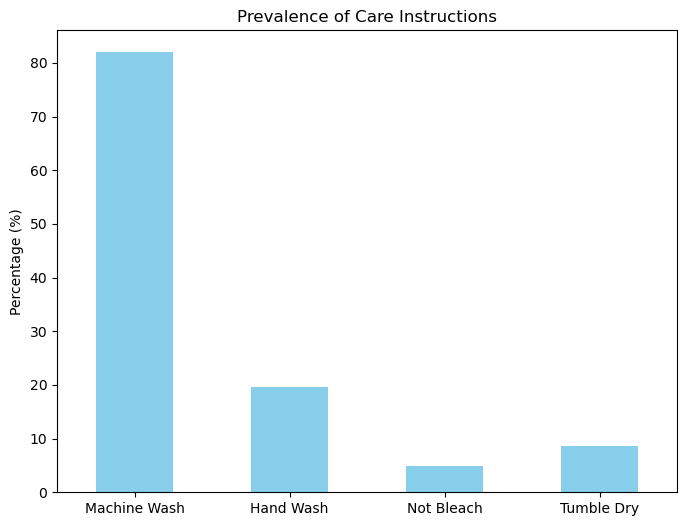

In [220]:
care_features = ['Machine Wash', 'Hand Wash', 'Not Bleach', 'Tumble Dry']
prevalence = df[care_features].mean() * 100  

# Bar plot of feature prevalence
prevalence.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title("Prevalence of Care Instructions")
plt.xticks(rotation=0)
plt.ylabel("Percentage (%)")
plt.show()


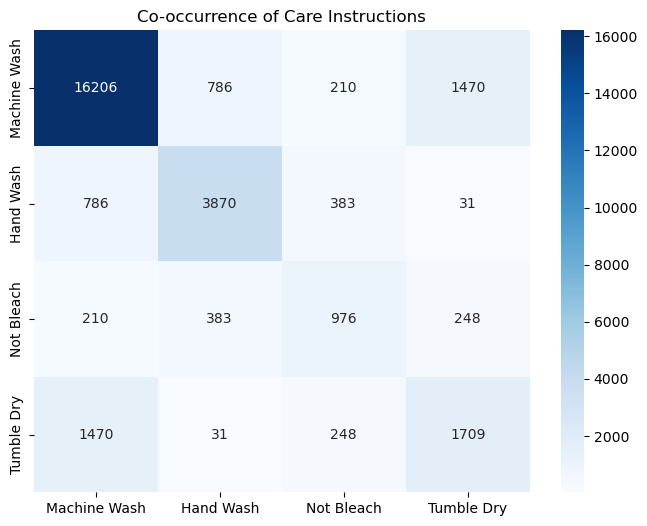

In [301]:
# care instructions co-occur.
cooccurrence = df[care_features].T.dot(df[care_features])
plt.figure(figsize=(8, 6))
sns.heatmap(cooccurrence, annot=True, cmap='Blues', fmt="d")
plt.title("Co-occurrence of Care Instructions")
plt.show()


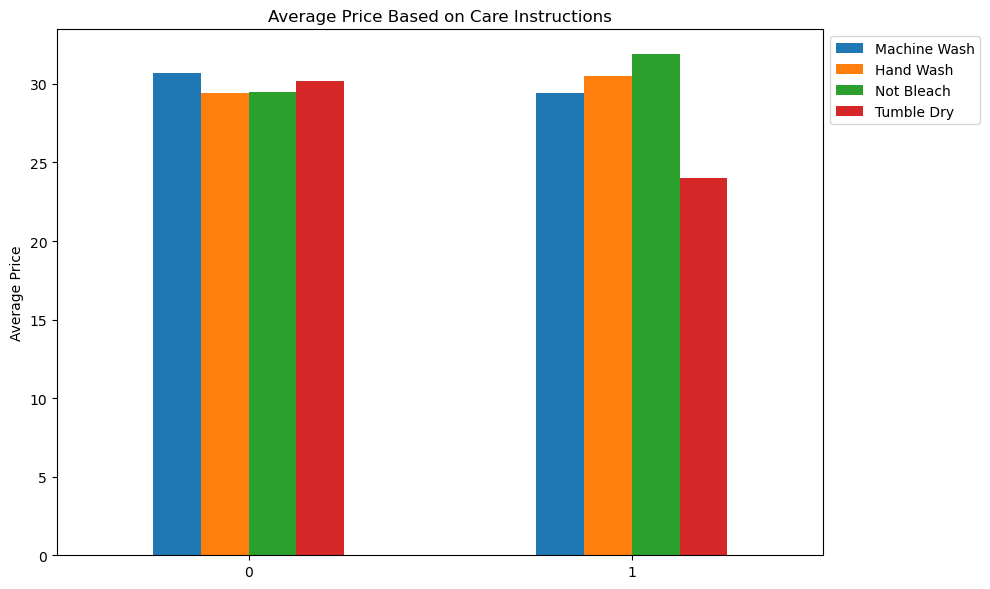

In [303]:
price_relationship = {}
for feature in care_features:
    price_relationship[feature] = df.groupby(feature)['price'].mean()
price_relationship = pd.DataFrame(price_relationship)

# Visualization
price_relationship.plot(kind='bar', figsize=(10, 6))
plt.title("Average Price Based on Care Instructions")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.tight_layout() 
plt.show()


## Closure

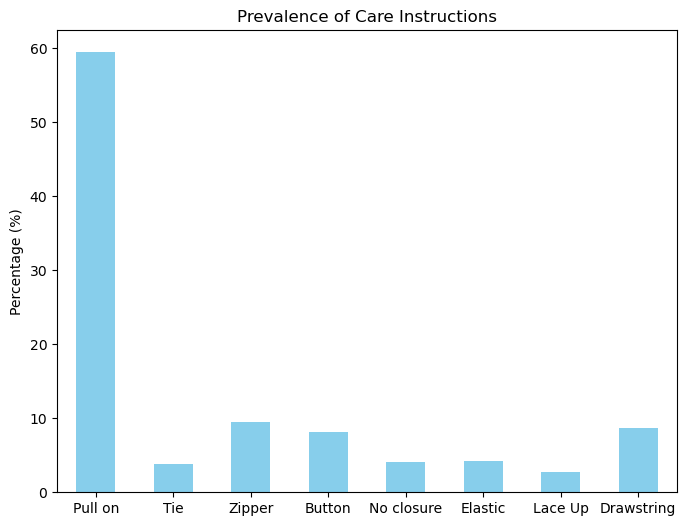

In [232]:
closure_features =['Pull on', 'Tie', 'Zipper', 'Button', 'No closure',
       'Elastic', 'Lace Up', 'Drawstring']

prevalence = df[closure_features].mean() * 100  

# Bar plot of feature prevalence
prevalence.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title("Prevalence of Care Instructions")
plt.xticks(rotation=0)
plt.ylabel("Percentage (%)")
plt.show()

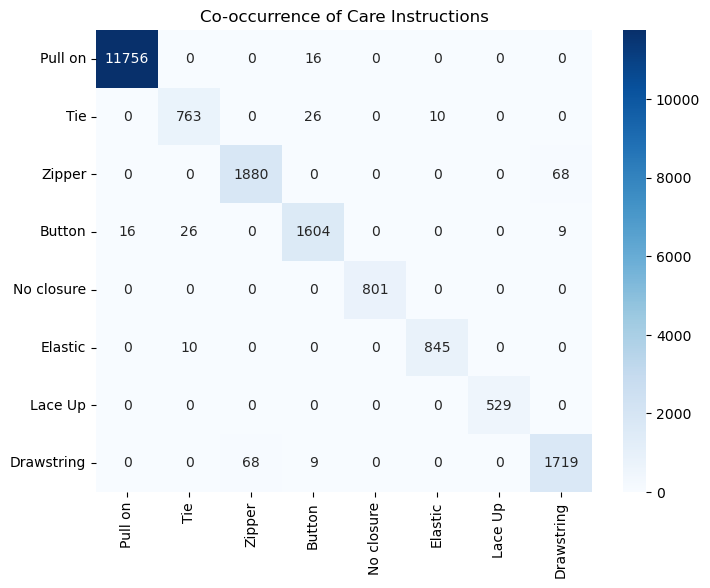

In [233]:
# care instructions co-occur.

cooccurrence = df[closure_features].T.dot(df[closure_features])
plt.figure(figsize=(8, 6))
sns.heatmap(cooccurrence, annot=True, cmap='Blues', fmt="d")
plt.title("Co-occurrence of Care Instructions")
plt.show()


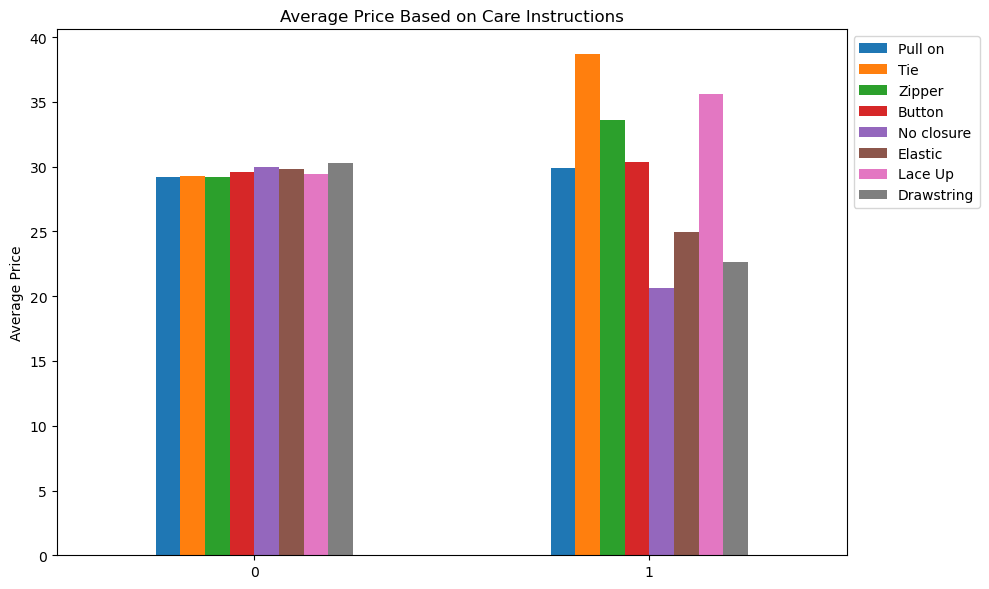

In [302]:
price_relationship = {}
for feature in closure_features:
    price_relationship[feature] = df.groupby(feature)['price'].mean()
price_relationship = pd.DataFrame(price_relationship)

# Visualization
price_relationship.plot(kind='bar', figsize=(10, 6))
plt.title("Average Price Based on Care Instructions")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.tight_layout() 
plt.show()

## Fabric

In [235]:
fabrics =['Polyester', 'Spandex', 'Nylon',
       'Cotton', 'Rayon', 'Acrylic', 'Modal', 'Wool', 'Lyocell', 'Leather',
       'Linen', 'Silk']

Polyester    55.613537
Spandex       4.268965
Nylon        10.093818
Cotton       21.676851
Rayon         6.177185
Acrylic       0.337819
Modal         1.147157
Wool          0.140353
Lyocell       0.318697
Leather       0.075880
Linen         0.068798
Silk          0.080939
dtype: float64


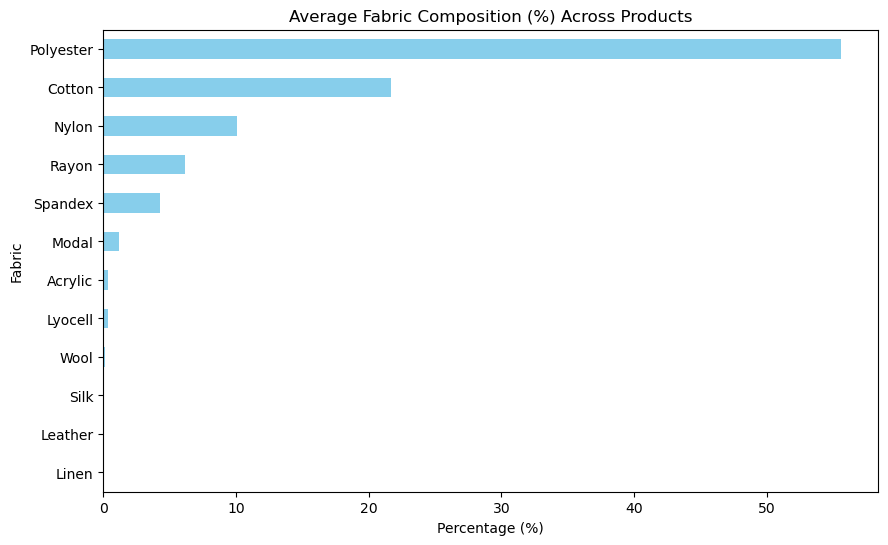

In [236]:
fabric_features = ['Polyester', 'Spandex', 'Nylon', 'Cotton', 'Rayon', 'Acrylic',
                   'Modal', 'Wool', 'Lyocell', 'Leather', 'Linen', 'Silk']

fabric_prevalence = df[fabric_features].mean() * 100  # Convert to percentage
print(fabric_prevalence)

# Visualize fabric prevalence
fabric_prevalence.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Average Fabric Composition (%) Across Products")
plt.xlabel("Percentage (%)")
plt.ylabel("Fabric")
plt.show()


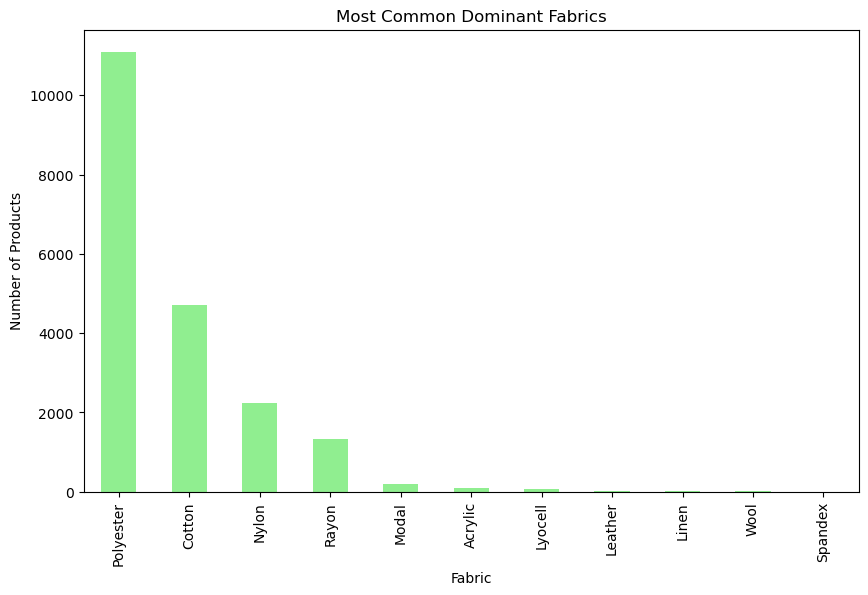

In [294]:
df['dominant_fabric'] = df[fabric_features].idxmax(axis=1)
dominant_fabric_count = df['dominant_fabric'].value_counts()

# Visualize dominant fabrics
dominant_fabric_count.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title("Most Common Dominant Fabrics")
plt.xlabel("Fabric")
plt.ylabel("Number of Products")
plt.show()


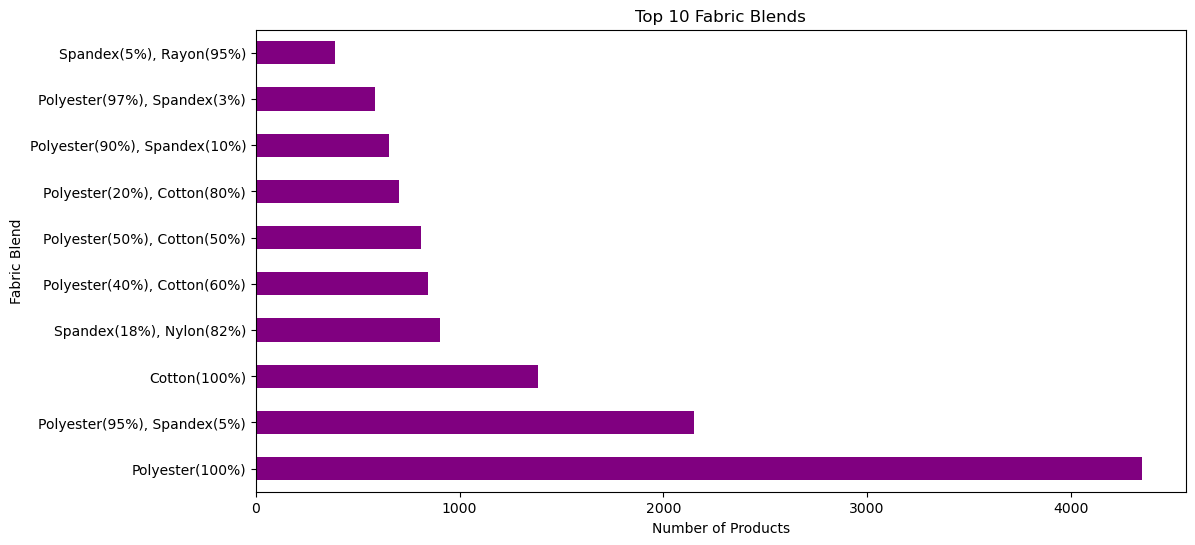

In [238]:
df['fabric_blend'] = df[fabric_features].apply(lambda row: ', '.join([f"{fabric}({int(row[fabric]*100)}%)" for fabric in fabric_features if row[fabric] > 0]), axis=1)
blend_counts = df['fabric_blend'].value_counts()

# Visualize top fabric blends
blend_counts.head(10).plot(kind='barh', figsize=(12, 6), color='purple')
plt.title("Top 10 Fabric Blends")
plt.xlabel("Number of Products")
plt.ylabel("Fabric Blend")
plt.show()


In [246]:
fabric_price = {}
fabric_features

['Polyester',
 'Spandex',
 'Nylon',
 'Cotton',
 'Rayon',
 'Acrylic',
 'Modal',
 'Wool',
 'Lyocell',
 'Leather',
 'Linen',
 'Silk']

In [265]:
global_min = df[fabric_features].min().min()  
global_max = df[fabric_features].max().max()

In [268]:
bins = np.linspace(global_min, global_max, 5)

In [270]:
fabric_price = {}
for fabric in fabric_features:
    grouped = df.groupby(pd.cut(df[fabric], bins=bins, include_lowest=True), observed=False)['price'].mean()
    fabric_price[fabric] = grouped.reset_index()

In [279]:
result_df = pd.DataFrame()
result_df['bin'] = fabric_price['Polyester']['Polyester']  # Add bins as the index

for fabric, df in fabric_price.items():
    result_df[fabric] = df['price'].values  # Add prices for each fabric

In [282]:
result_df.set_index('bin', inplace=True)

In [283]:
result_df

,Polyester,Spandex,Nylon,Cotton,Rayon,Acrylic,Modal,Wool,Lyocell,Leather,Linen,Silk
bin,,,,,,,,,,,,
"(-0.001, 0.25]",27.874068,29.626394,29.906372,30.243214,29.937471,29.588316,29.778966,29.623141,29.586595,29.645692,29.637409,29.631212
"(0.25, 0.5]",27.931211,30.844430,23.125248,28.185004,28.471637,37.535556,14.244167,NaN,NaN,NaN,29.256667,29.415000
"(0.5, 0.75]",30.284007,NaN,38.900901,26.919631,25.486531,38.813922,NaN,NaN,NaN,NaN,19.990000,NaN
"(0.75, 1.0]",31.334757,19.990000,27.655075,29.269869,25.171584,38.591818,25.107394,54.770000,43.446508,9.990000,NaN,NaN


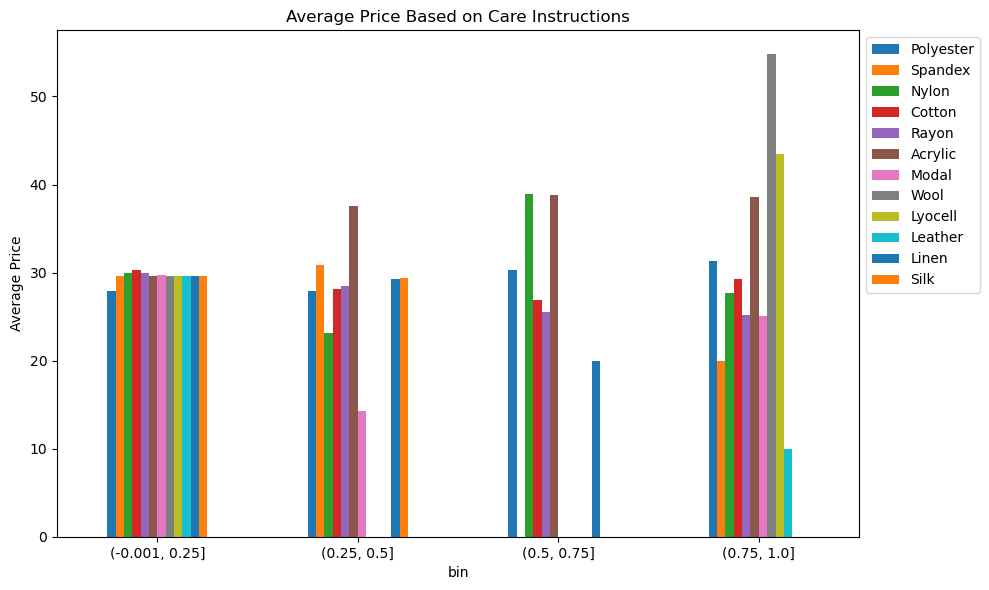

In [ ]:
ax = result_df.plot(kind='bar', figsize=(10, 6))
plt.title("Average Price Based on Care Instructions")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.tight_layout() 
plt.show()

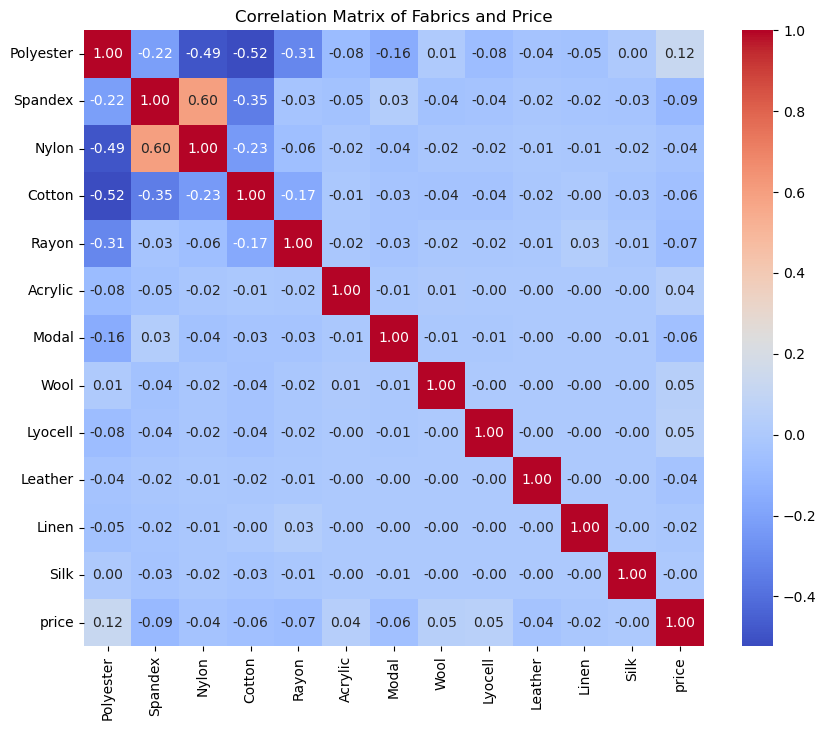

In [291]:
fabric_correlation = df[fabric_features+['price']].corr()

# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(fabric_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Fabrics and Price")
plt.show()


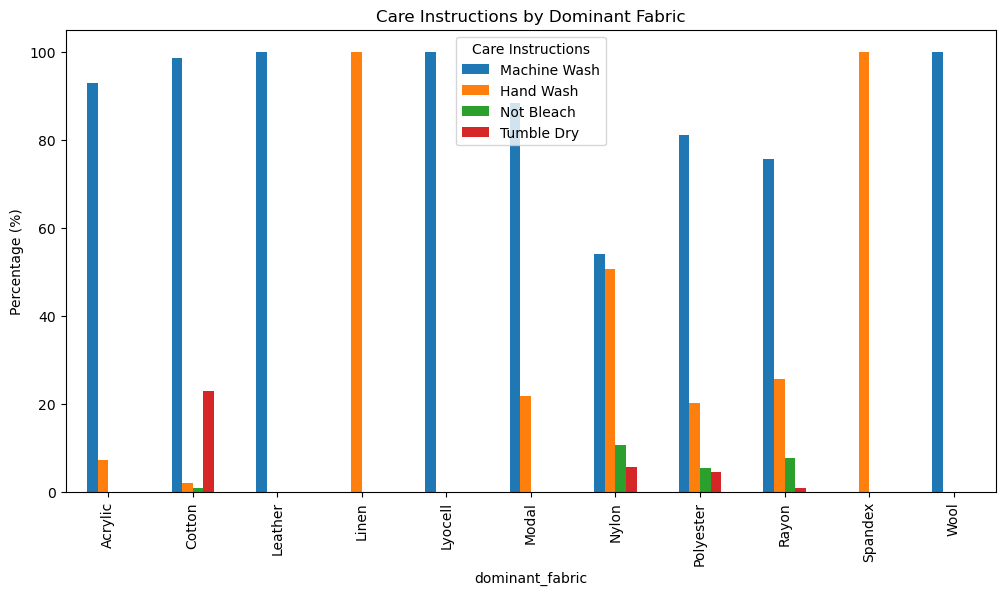

In [295]:
care_features = ['Machine Wash', 'Hand Wash', 'Not Bleach', 'Tumble Dry']

care_fabric_relationship = df.groupby('dominant_fabric')[care_features].mean() * 100
care_fabric_relationship.plot(kind='bar', figsize=(12, 6))
plt.title("Care Instructions by Dominant Fabric")
plt.ylabel("Percentage (%)")
plt.legend(title="Care Instructions")
plt.show()


## Extra EDA

# Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['brand'] = encoder.fit_transform(df['brand'])

C:\Users\eroma\AppData\Local\Temp\ipykernel_15756\8519952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'] = encoder.fit_transform(df['brand'])


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['brand'] = encoder.fit_transform(df['brand'])

In [20]:
df['brand'].unique()

array([295, 198, 316, 298, 406, 373, 370,  80, 146, 144, 393, 227, 237,
       383, 193, 322,   8, 116, 243, 134, 329,   4, 132, 318, 162, 256,
       131,  65, 308, 289, 446, 276,  39, 247, 334, 279,  88,  92, 257,
       216, 109,  23, 442, 206, 220, 230,  12, 349,  75, 226,  51, 398,
       387, 154, 111, 304, 155,  87, 324, 284, 392,  63, 100, 127, 430,
       221, 451, 374,  69, 145, 137,  57, 238, 171,  89, 309, 312, 450,
       229, 267, 400, 187, 359, 282, 110, 139, 313, 234,  77,  11, 151,
       275, 274, 418, 106, 401, 204,  21,  32, 117, 434, 299, 394, 307,
       215, 396, 252, 147, 273, 285, 305,  94, 178,  61,  97, 232, 203,
        28,  56, 288, 429, 341, 210, 319, 402, 448,  78, 200, 294,  74,
       385,  99,  73, 435, 391, 368, 108, 419, 415, 436, 366, 142, 344,
       404, 437, 388, 317,  83, 176, 340,   9, 240, 371, 405, 121, 211,
       335, 180,  55,  85,   0, 191,  18, 177, 165,  19,  67, 420, 426,
       101,  33,  95, 321, 190, 390,  64, 424, 270, 380, 254, 40

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
df['color'] = encoder1.fit_transform(df['color'])

C:\Users\eroma\AppData\Local\Temp\ipykernel_15756\3882315023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = encoder1.fit_transform(df['color'])


In [23]:
df['color'].value_counts()

color
0     3388
1     3131
3     2309
9     2039
10    1643
7     1435
4     1126
2     1094
5     1051
8      768
6      691
11     405
Name: count, dtype: int64

In [25]:
dict(enumerate(encoder1.classes_))


{0: 'Black',
 1: 'Blue',
 2: 'Brown',
 3: 'Green',
 4: 'Grey',
 5: 'Navy',
 6: 'Orange',
 7: 'Pink',
 8: 'Purple',
 9: 'Red',
 10: 'White',
 11: 'Yellow'}

In [31]:
df.dtypes

name             object
asin             object
brand             int32
color             int32
size            float64
price           float64
department       object
origin           object
rating          float64
star            float64
url              object
Polyester       float64
Spandex         float64
Nylon           float64
Cotton          float64
Rayon           float64
Acrylic         float64
Modal           float64
Wool            float64
Lyocell           int64
Leather           int64
Linen           float64
Silk            float64
Machine Wash      int64
Hand Wash         int64
Not Bleach        int64
Tumble Dry        int64
Pull on           int64
Tie               int64
Zipper            int64
Button            int64
No closure        int64
Elastic           int64
Lace Up           int64
Drawstring        int64
dtype: object

In [27]:
draw_missing_data_table(df)

,Total,Percent
name,0,0.0
Tumble Dry,0,0.0
Leather,0,0.0
Linen,0,0.0
Silk,0,0.0
Machine Wash,0,0.0
Hand Wash,0,0.0
Not Bleach,0,0.0
Pull on,0,0.0
Wool,0,0.0


In [32]:
df['department'].value_counts()

department
Women     12588
Men        6334
Unisex      158
Name: count, dtype: int64

In [40]:
sex_map = {'Unisex':0,'Women':1, 'Men':2}
df['department'] = df['department'].map(sex_map)

C:\Users\eroma\AppData\Local\Temp\ipykernel_15756\1962357166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = df['department'].map(sex_map)


In [42]:
df['department'].value_counts()

department
1    12588
2     6334
0      158
Name: count, dtype: int64

In [43]:
df['origin'].value_counts()

origin
Imported       18055
Made in USA     1025
Name: count, dtype: int64

In [44]:
origin_map = {'Imported':0,'Made in USA':1}
df['origin'] = df['origin'].map(origin_map)

C:\Users\eroma\AppData\Local\Temp\ipykernel_15756\276043696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['origin'] = df['origin'].map(origin_map)


In [46]:
df.to_json('preprocess_data.json',index=False)

In [47]:
dk=pd.read_json('preprocess_data.json')

In [48]:
dk

,name,asin,brand,color,size,price,department,origin,rating,star,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3G46LT,295,5,0,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
1,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CYGX1VRB,295,0,2,45.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
2,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CWLJN23H,295,0,3,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
3,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3JXKKT,295,1,1,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
4,2Pack Men's Rash Guard UPF 50+ Sun Protection ...,B0CQC72M2D,198,0,4,16.99,2,0,35,4.1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,Women's Full Slips Adjustable Spaghetti Strap ...,B0D1TH4KMX,158,10,3,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19764,Women's Full Slips Adjustable Spaghetti Strap ...,B0D8SXP3WB,158,7,2,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19765,Women's Full Slips Adjustable Spaghetti Strap ...,B0D8SYVMC4,158,1,1,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19766,Women's Full Slips Adjustable Spaghetti Strap ...,B0CTYL3FB9,158,5,2,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0


In [49]:
dk.dtypes

name             object
asin             object
brand             int64
color             int64
size              int64
price           float64
department        int64
origin            int64
rating            int64
star            float64
url              object
Polyester       float64
Spandex         float64
Nylon           float64
Cotton          float64
Rayon           float64
Acrylic         float64
Modal           float64
Wool            float64
Lyocell           int64
Leather           int64
Linen           float64
Silk            float64
Machine Wash      int64
Hand Wash         int64
Not Bleach        int64
Tumble Dry        int64
Pull on           int64
Tie               int64
Zipper            int64
Button            int64
No closure        int64
Elastic           int64
Lace Up           int64
Drawstring        int64
dtype: object